### Graph Visuals Creation

In [1]:
import pandas as pd
results_df = pd.read_csv('approach1_final.csv')

In [2]:
df = pd.read_csv('final_clustered_data')

In [3]:
pd.reset_option('display.max_colwidth')

In [4]:
results = results_df[1:]

### Histograms for the presidctions

In [5]:
# 1. Histogram for predicted meso labels: 
import pandas as pd
meso = pd.read_csv('meso_labels2')

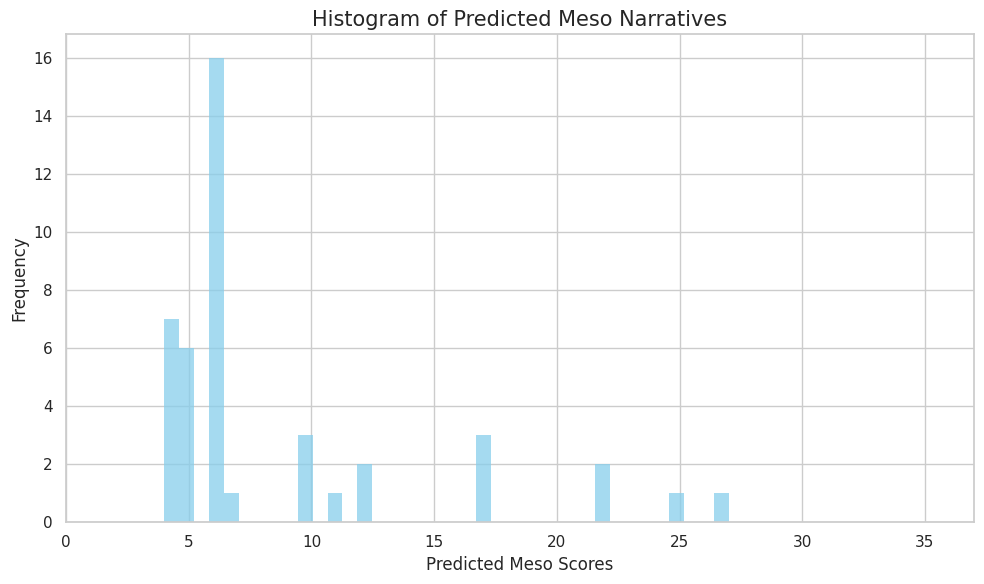

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'predicted_meso' to numeric and drop NaN values
meso['predicted_meso'] = pd.to_numeric(meso['predicted_meso'], errors='coerce')
meso = meso.dropna(subset=['predicted_meso'])

# Set the aesthetic style of the plots
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(meso['predicted_meso'], bins=38, kde=False, color="skyblue", linewidth=0)
plt.gca().patches[0].set_linewidth(0)  

plt.title('Histogram of Predicted Meso Narratives', fontsize=15)
plt.xlabel('Predicted Meso Scores', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim([0, 37]) 

# Show the plot
plt.tight_layout()
plt.show()


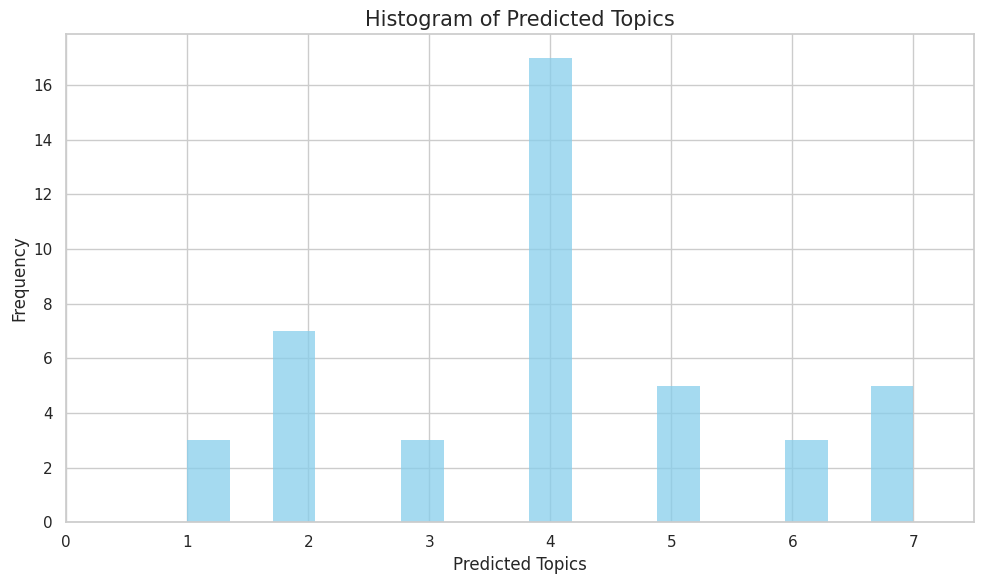

In [18]:
topic = pd.read_csv('predicted_topic_labels2')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

topic['predicted_topic'] = pd.to_numeric(topic['predicted_topic'], errors='coerce')
topic = topic.dropna(subset=['predicted_topic'])
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bin_width = (7 - 0) / 20
sns.histplot(topic['predicted_topic'], binwidth=bin_width, kde=False, color="skyblue", linewidth=0)

plt.title('Histogram of Predicted Topics', fontsize=15)
plt.xlabel('Predicted Topics', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim([0, 7.5])  # Adjust this if the x-axis needs to show more range

# Show the plot
plt.tight_layout()
plt.show()


### Humanizing language Predictions

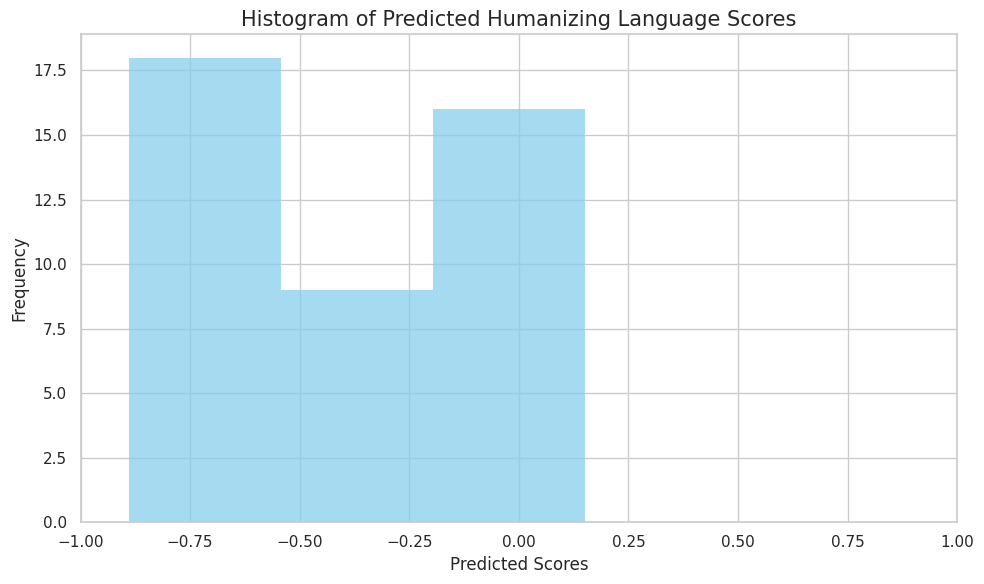

In [56]:
dehuman1 = pd.read_csv('dehumanization_scores4')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dehuman1['predicted_score'] = pd.to_numeric(dehuman1['predicted_score'], errors='coerce')
dehuman1 = dehuman1.dropna(subset=['predicted_score'])
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bin_width = (7 - 0) / 20
sns.histplot(dehuman1['predicted_score'], binwidth=bin_width, kde=False, color="skyblue", linewidth=0)

plt.title('Histogram of Predicted Humanizing Language Scores', fontsize=15)
plt.xlabel('Predicted Scores', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim([-1, 1])  # Adjust this if the x-axis needs to show more range

# Show the plot
plt.tight_layout()
plt.show()

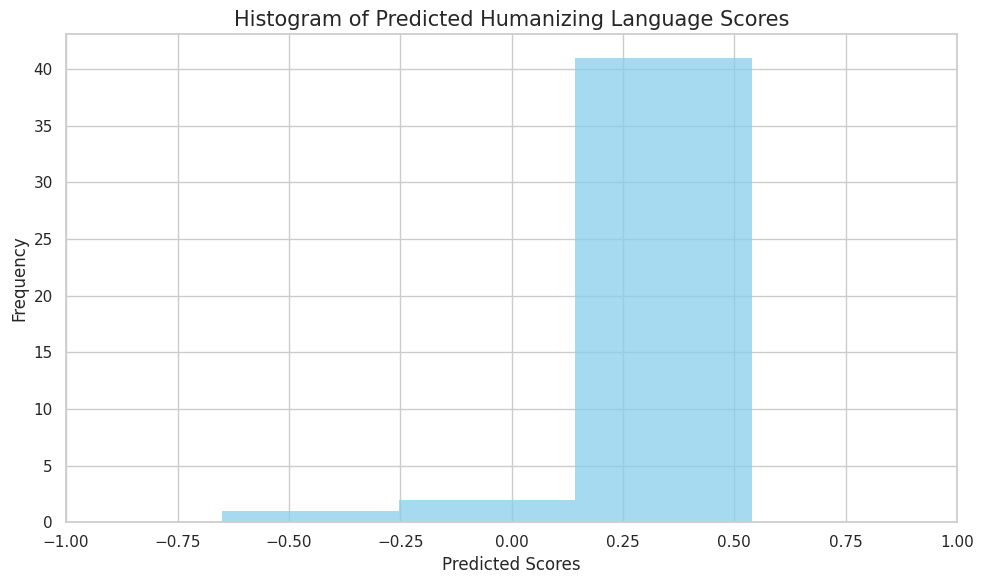

In [5]:
dehuman2 = pd.read_csv('dehuman_bench.csv')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dehuman2['Perspective(ws)'] = pd.to_numeric(dehuman2['Perspective(ws)'], errors='coerce')
dehuman2 = dehuman2.dropna(subset=['Perspective(ws)'])
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bin_width = (7 - 0) / 20
sns.histplot(dehuman2['Perspective(ws)'], binwidth=bin_width, kde=False, color="skyblue", linewidth=0)

plt.title('Histogram of Predicted Humanizing Language Scores', fontsize=15)
plt.xlabel('Predicted Scores', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim([-1, 1])  # Adjust this if the x-axis needs to show more range

# Show the plot
plt.tight_layout()
plt.show()

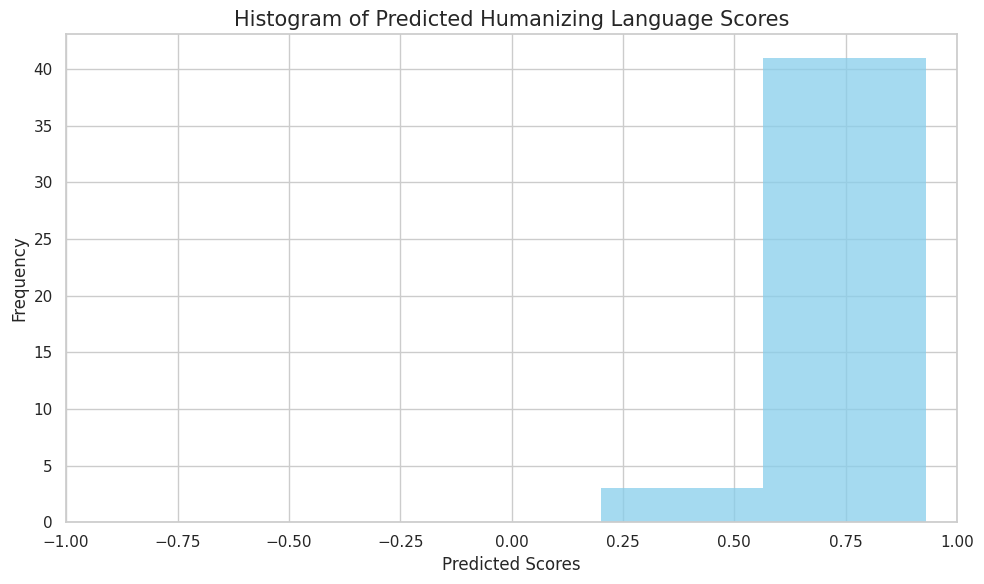

In [6]:
dehuman2 = pd.read_csv('dehuman_bench.csv')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dehuman2['Value(s)'] = pd.to_numeric(dehuman2['Value(s)'], errors='coerce')
dehuman2 = dehuman2.dropna(subset=['Value(s)'])
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bin_width = (7 - 0) / 20
sns.histplot(dehuman2['Value(s)'], binwidth=bin_width, kde=False, color="skyblue", linewidth=0)

plt.title('Histogram of Predicted Humanizing Language Scores', fontsize=15)
plt.xlabel('Predicted Scores', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim([-1, 1])  # Adjust this if the x-axis needs to show more range

# Show the plot
plt.tight_layout()
plt.show()

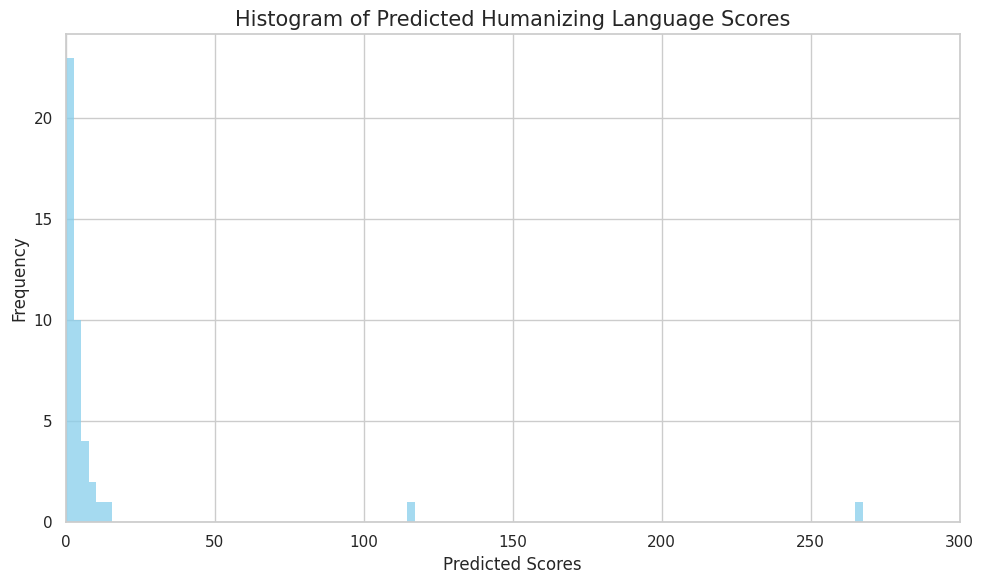

In [11]:
dehuman2 = pd.read_csv('dehuman_bench.csv')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dehuman2['total_dictionaries'] = pd.to_numeric(dehuman2['total_dictionaries'], errors='coerce')
dehuman2 = dehuman2.dropna(subset=['total_dictionaries'])
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
#bin_width = (7 - 0) / 20
sns.histplot(dehuman2['total_dictionaries'], kde=False, color="skyblue", linewidth=0)
#, binwidth=bin_width

plt.title('Histogram of Predicted Humanizing Language Scores', fontsize=15)
plt.xlabel('Predicted Scores', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim([0, 300])  # Adjust this if the x-axis needs to show more range

# Show the plot
plt.tight_layout()
plt.show()

### Getting the number of SVOs in each cluster

In [5]:
# Table with example SVOs and outlet proportions (top 5 most frequent SVOs per cluster)

def calculate_aggregations(df):
    grouped = df.groupby('hdb_string_clusters')
    outlet_counts = grouped['Outlet'].value_counts().unstack(fill_value=0)
    outlet_proportions = outlet_counts.div(outlet_counts.sum(axis=1), axis=0).round(2)
    sums = grouped[['EU_Mentions', 'NonEU_Mentions', 'GN_Mentions', 'GS_Mentions', 'Total_Count', 'n_articles']].sum()
    num_svos = grouped.size().rename('num_svos')
    combined = outlet_proportions.join(sums).join(num_svos)
    return combined

def get_top_svos(df, n_top=5):
    # Group by 'hdb_string_clusters' and 'string_SVO', then count occurrences
    freq = df.groupby(['hdb_string_clusters', 'string_SVO_col']).size().reset_index(name='counts')
    top_svos = freq.groupby('hdb_string_clusters').apply(lambda x: '\n'.join(x.sort_values('counts', ascending=False).head(n_top)['string_SVO_col'])).reset_index(name='Top_SVOs')
    return top_svos

In [6]:
final_df = df 
aggregated_data = calculate_aggregations(final_df)
top_svos = get_top_svos(final_df)
result_df = top_svos.merge(aggregated_data, on='hdb_string_clusters', how='left')

/tmp/ipykernel_931563/3869691673.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_svos = freq.groupby('hdb_string_clusters').apply(lambda x: '\n'.join(x.sort_values('counts', ascending=False).head(n_top)['string_SVO_col'])).reset_index(name='Top_SVOs')


In [7]:
results_df

hdb_string_clusters                                           Top_SVOs  \
0                    -1  zone have lift\n1 deem informal\n1,000 reach u...   
1                     0  you have food\nauthority provide food\nbiden a...   
2                     1  who support democrats\ndemocrats accuse govern...   
3                     2  you get flight\naircraft assist crew\nwe get f...   
4                     3  who use republicans\nbiden accuse republicans\...   
5                     4  who visit australia\nalex tell australia\nspok...   
6                     5  warsaw accuse putin\nagency quote putin\nbiden...   
7                     6  you see hundred\naccommodation cost million\na...   
8                     7  you spend year\naccomplice face year\nwhich ca...   
9                     8  you spend month\nbusiness have month\ncase tak...   
10                    9  president unveil proposal\npresident urge bide...   
11                   10  you call police\nanyone call police\npolice up...   
12                   11  who support trump\nap declare trump\nbiden acc...   
13                   12  you compare israel\nadministration tell israel...   
14                   13  you own house\nbiden address house\nbraverman ...   
15                   14  you seek asylum\nali claim asylum\nwho give as...   
16                   15  we have party\nwe need party\nwe see party\nwe...   
17                   16  who support russia\nactivist flee russia\nruss...   
18                   17  who tell court\nbardo tell court\ncase reach c...   
19                   18  you win election\nalliance win election\nbiden...   
20                   19  you see woman\nbegum describe which\nbegum do ...   
21                   20  which kill palestinians\naction kill palestini...   
22                   21  who back braverman\nbraverman accept point\nbr...   
23                   22  you want change\nauthority reach uk\nbill put ...   
24                   23  you re migrant\naccept see migrant\nwhich supp...   
25                   24  you make law\nact become law\nbill become law\...   
26                   25  you tell family\napplication have family\nauth...   
27                   26  you have minister\nactivist attend meeting\nwh...   
28                   27  you slaughter civilian\nairstrike kill command...   
29                   28  you see time\nassessment take time\nbe give ti...   
30                   29  you want growth\nadministration expand enforce...   
31                   30  you see number\narea have number\ncountry have...   
32                   31  you take job\nemployer have job\nhe get job\ni...   
33                   32  who call office\nadministration release datum\...   
34                   33  you see government\nadministration announce ad...   
35                   34  you leave what\ni leave alone\nwe scrap plan\n...   
36                   35  you see impact\nact have consequence\naction h...   
37                   36  you see problem\nactivist express concern\nadv...   
38                   37  you need thing\nconcern require consideration\...   
39                   38  you thank you\nbiden have respect\ni accept th...   
40                   39  you use this\nboth make sense\nconcept make se...   
41                   40  you see lot\nwhich generate lot\nwhich get lot...   
42                   41  you not use language\nagency not provide detai...   
43                   42  you see nothing\nwhich do nothing\nwhich have ...   

    both  guardian  telegraph  EU_Mentions  NonEU_Mentions  GN_Mentions  \
0   0.39      0.39       0.21       170533          605728       294914   
1   0.53      0.33       0.14          309            1248          509   
2   0.27      0.54       0.19          140             968          338   
3   0.30      0.44       0.26          659            2881         1134   
4   0.25      0.69       0.06          121            1206          372   
5   0.08      0.88       0.04          253 

In [8]:
result_df = result_df[1:]

In [9]:
# result_df is the one that corresponds exactly to Robert's labels
result_df

hdb_string_clusters                                           Top_SVOs  \
1                     0  you have food\nauthority provide food\nbiden a...   
2                     1  who support democrats\ndemocrats accuse govern...   
3                     2  you get flight\naircraft assist crew\nwe get f...   
4                     3  who use republicans\nbiden accuse republicans\...   
5                     4  who visit australia\nalex tell australia\nspok...   
6                     5  warsaw accuse putin\nagency quote putin\nbiden...   
7                     6  government pay million\ngovernment spend billi...   
8                     7  government spend year\nuk have year\nuk face y...   
9                     8  you spend month\nbusiness have month\ncase tak...   
10                    9  president unveil proposal\npresident urge bide...   
11                   10  police lead investigation\npolice investigate ...   
12                   11  trump call what\ntrump face charge\ntrump orde...   
13                   12  you compare israel\nadministration tell israel...   
14                   13  secretary tell house\nwhich pass house\ni info...   
15                   14  people seek asylum\npeople claim asylum\npopul...   
16                   15  party hold lead\nparty have chance\nparty have...   
17                   16  who support russia\nactivist flee russia\nruss...   
18                   17  court make ruling\nkc tell court\njudge hear a...   
19                   18  government have majority\nparty win seat\npart...   
20                   19  i m girl\nthose include woman\ntiwari tell i\n...   
21                   20  which kill palestinians\naction kill palestini...   
22                   21  braverman tell conference\nbraverman take resp...   
23                   22  you want change\nauthority reach uk\nbill put ...   
24                   23  migrant cross channel\nmigrant show migrant\nt...   
25                   24  bill become law\ngovernment pass law\ngovernme...   
26                   25  you tell family\napplication have family\nauth...   
27                   26  he become minister\ni ask minister\nminister t...   
28                   27  people kill people\nwho kill father\nstrike ki...   
29                   28  you see time\nassessment take time\nbe give ti...   
30                   29  government increase number\nwe get growth\nwe ...   
31                   30  you see number\narea have number\ncountry have...   
32                   31  people do job\npeople find job\nwho have work\...   
33                   32  we contact office\noffice issue notice\ni cont...   
34                   33  government introduce system\ngovernment introd...   
35                   34  you leave what\ni leave alone\nwe scrap plan\n...   
36                   35  people have choice\nthose have choice\nthose h...   
37                   36  people raise concern\npeople have problem\nwe ...   
38                   37  you need thing\nconcern require consideration\...   
39                   38  you thank you\nbiden have respect\ni accept th...   
40                   39  we not support bill\nyou not receive briefing\...   
41                   40  government do nothing\npeople do nothing\nwe n...   
42                   41  people have right\nthat s i\nwe have those\nwe...   
43                   42  you see lot\nwhich generate lot\nwhich get lot...   

    both  guardian  telegraph  EU_Mentions  NonEU_Mentions  GN_Mentions  \
1   0.53      0.33       0.14          309            1248          509   
2   0.27      0.54       0.19          140             968          338   
3   0.30      0.44       0.26          659            2881         1134   
4   0.25      0.69       0.06          121            1206          372   
5   0.08      0.88       0.04          253            2388         1092   
6   0.42      0.46       0.12         1499            2902         2019   
7   0.42      0.21       0.37         1191    

In [10]:
# Ignoring cluster -1 and assigning macro themes
macro = [
    "integration", "systems/policy", "crime/law", "systems/policy", "international issues",
    "international issues", "economics", "economics", "integration", "systems/policy",
    "crime/law", "systems/policy", "international issues", "integration", "integration",
    "systems/policy", "international issues", "crime/law", "systems/policy", "integration",
    "international issues", "systems/policy", "flows", "flows", "crime/law",
    "integration", "systems/policy", "crime/law", "integration", "economics",
    "flows", "economics", "systems/policy", "systems/policy", "flows", "public attitudes", "public attitudes",
    "public attitudes", "integration", "flows", "integration", "economics",
    "integration"
]
result_df['macro'] = macro

In [11]:
# Labelling cluster titles

titles = [
    "Food Access", "Democrats", "Flights & Airstrikes", "Republicans", "Australia Benchmarks",
    "Putin Actions", "Country Expenditures", "Attributes with Year Duration", "Attributes with Weeks Duration", "President Actions & Decisions",
    "Police Actions", "Trump Actions & Attributes", "Israel Actions & Attributes", "Housing Situation", "Asylum & Refuge",
    "Political Parties", "Russia & Ukraine", "Court Legislations", "Elections & Votes", "Centered Around Female Migrant Expriences",
    "Israel & Hamas Attacks", "Braverman Actions & Attributes", "Country Inflows", "Stories About Migrant Flows", "Legislative Law",
    "Family Experiences", "Ministerial Talks & Decisions", "Victim Killings", "Time to Integrate", "Macroeconomic Impacts",
    "Number of Migrants", "Job Market", "Government Office Policies", "Government Actions", "Leaving Home", "Perceptions of Choices & Impacts", "Perceived Concerns",
    "Migrant & Third Party Needs", "Support to Migrants", "Disagreement to Actions", "Lack of Actions & Solutions", "Individual Perceptions",
    "Voicing Support and Value"
]
result_df['title'] = titles


In [12]:
result_df

hdb_string_clusters                                           Top_SVOs  \
1                     0  you have food\nauthority provide food\nbiden a...   
2                     1  who support democrats\ndemocrats accuse govern...   
3                     2  you get flight\naircraft assist crew\nwe get f...   
4                     3  who use republicans\nbiden accuse republicans\...   
5                     4  who visit australia\nalex tell australia\nspok...   
6                     5  warsaw accuse putin\nagency quote putin\nbiden...   
7                     6  government pay million\ngovernment spend billi...   
8                     7  government spend year\nuk have year\nuk face y...   
9                     8  you spend month\nbusiness have month\ncase tak...   
10                    9  president unveil proposal\npresident urge bide...   
11                   10  police lead investigation\npolice investigate ...   
12                   11  trump call what\ntrump face charge\ntrump orde...   
13                   12  you compare israel\nadministration tell israel...   
14                   13  secretary tell house\nwhich pass house\ni info...   
15                   14  people seek asylum\npeople claim asylum\npopul...   
16                   15  party hold lead\nparty have chance\nparty have...   
17                   16  who support russia\nactivist flee russia\nruss...   
18                   17  court make ruling\nkc tell court\njudge hear a...   
19                   18  government have majority\nparty win seat\npart...   
20                   19  i m girl\nthose include woman\ntiwari tell i\n...   
21                   20  which kill palestinians\naction kill palestini...   
22                   21  braverman tell conference\nbraverman take resp...   
23                   22  you want change\nauthority reach uk\nbill put ...   
24                   23  migrant cross channel\nmigrant show migrant\nt...   
25                   24  bill become law\ngovernment pass law\ngovernme...   
26                   25  you tell family\napplication have family\nauth...   
27                   26  he become minister\ni ask minister\nminister t...   
28                   27  people kill people\nwho kill father\nstrike ki...   
29                   28  you see time\nassessment take time\nbe give ti...   
30                   29  government increase number\nwe get growth\nwe ...   
31                   30  you see number\narea have number\ncountry have...   
32                   31  people do job\npeople find job\nwho have work\...   
33                   32  we contact office\noffice issue notice\ni cont...   
34                   33  government introduce system\ngovernment introd...   
35                   34  you leave what\ni leave alone\nwe scrap plan\n...   
36                   35  people have choice\nthose have choice\nthose h...   
37                   36  people raise concern\npeople have problem\nwe ...   
38                   37  you need thing\nconcern require consideration\...   
39                   38  you thank you\nbiden have respect\ni accept th...   
40                   39  we not support bill\nyou not receive briefing\...   
41                   40  government do nothing\npeople do nothing\nwe n...   
42                   41  people have right\nthat s i\nwe have those\nwe...   
43                   42  you see lot\nwhich generate lot\nwhich get lot...   

    both  guardian  telegraph  EU_Mentions  NonEU_Mentions  GN_Mentions  \
1   0.53      0.33       0.14          309            1248          509   
2   0.27      0.54       0.19          140             968          338   
3   0.30      0.44       0.26          659            2881         1134   
4   0.25      0.69       0.06          121            1206          372   
5   0.08      0.88       0.04          253            2388         1092   
6   0.42      0.46       0.12         1499            2902         2019   
7   0.42      0.21       0.37         1191    

### Creating Visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [14]:
# Calculate effective Telegraph and Guardian proportions
result_df['Effective_Telegraph'] = (result_df['telegraph'] * result_df['num_svos']) + (result_df['both'] * result_df['num_svos'])
result_df['Effective_Telegraph_prop'] = result_df['Effective_Telegraph']/result_df['num_svos']
result_df['Effective_Guardian'] = (result_df['guardian'] * result_df['num_svos']) + (result_df['both'] * result_df['num_svos'])
result_df['Effective_Guardian_prop'] = result_df['Effective_Guardian']/result_df['num_svos']

In [15]:
# plot with ALL clusters
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#top_clusters = result_df.sort_values(by='n_articles', ascending=False).head(15)
palette = sns.color_palette("hsv", len(result_df['macro'].unique()))
color_mapping = {category: color for category, color in zip(result_df['macro'].unique(), palette)}
result_df['color'] = result_df['macro'].map(color_mapping)

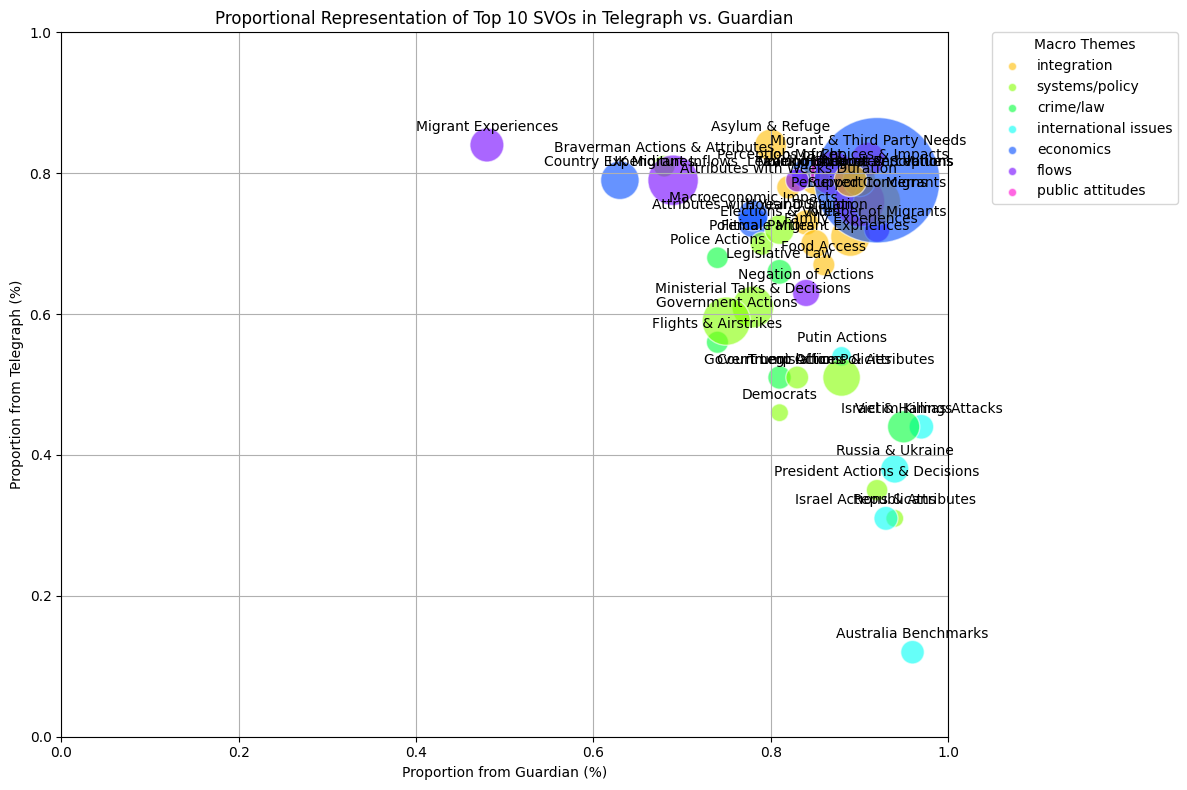

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from adjustText import adjust_text

# Create the plot
plt.figure(figsize=(12, 8))

# Scatter plot using the colors mapped in the DataFrame
scatter = plt.scatter(
    result_df['Effective_Guardian_prop'],
    result_df['Effective_Telegraph_prop'],
    s=result_df['n_articles'],
    color=result_df['color'],
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)


# Set plot limits and calculate margins
x_margin = (result_df['Effective_Guardian_prop'].max() - result_df['Effective_Guardian_prop'].min()) * 0.1
y_margin = (result_df['Effective_Telegraph_prop'].max() - result_df['Effective_Telegraph_prop'].min()) * 0.1
plt.xlim(result_df['Effective_Guardian_prop'].min() - x_margin, result_df['Effective_Guardian_prop'].max() + x_margin)
plt.ylim(result_df['Effective_Telegraph_prop'].min() - y_margin, result_df['Effective_Telegraph_prop'].max() + y_margin)

# Adding labels and title
plt.xlabel('Proportion from Guardian (%)')
plt.ylabel('Proportion from Telegraph (%)')
plt.title('Proportional Representation of Top 10 SVOs in Telegraph vs. Guardian')
plt.grid(True)

# Add legend manually for each 'macro' category
for category, color in color_mapping.items():
    plt.scatter([], [], color=color, label=category, alpha=0.6, edgecolors='w', linewidth=1)

# Annotating each point with the first SVO
# for i, row in top_clusters.iterrows():
#     first_svo = row['Top_SVOs'].split('\n')[0]
#     plt.text(row['Effective_Guardian_prop'], row['Effective_Telegraph_prop'], first_svo, fontsize=9)
# for i, row in result_df.iterrows():
#     first_svo = row['Top_SVOs'].split('\n')[0]  # Assuming Top_SVOs are separated by new lines
#     xy_text_position = (row['Effective_Guardian_prop'] + 0.05, row['Effective_Telegraph_prop'] + 0.05)
#     # Dynamically adjust position to keep annotations within plot boundaries
#     text_x = np.clip(xy_text_position[0], plt.xlim()[0] + x_margin, plt.xlim()[1] - x_margin)
#     text_y = np.clip(xy_text_position[1], plt.ylim()[0] + y_margin, plt.ylim()[1] - y_margin)
#     plt.annotate(
#         first_svo,
#         xy=(row['Effective_Guardian_prop'], row['Effective_Telegraph_prop']),
#         xytext=(text_x, text_y),
#         textcoords='data',
#         #arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='black'),
#         fontsize=9
#     )

for index, row in result_df.iterrows():
    plt.annotate(
        row['title'],
        (row['Effective_Guardian_prop'], row['Effective_Telegraph_prop']), 
        textcoords="offset points",
        xytext=(0,10), 
        ha='center' 
    )

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.legend(title='Macro Themes', loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Show plot
plt.tight_layout()
plt.show()


In [15]:
# Plotting top clusters only
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

top_clusters = result_df.sort_values(by='n_articles', ascending=False).head(15)
palette = sns.color_palette("hsv", len(result_df['macro'].unique()))
color_mapping = {category: color for category, color in zip(top_clusters['macro'].unique(), palette)}
top_clusters['color'] = top_clusters['macro'].map(color_mapping)

In [16]:
color_mapping

{'economics': (1.0, 0.741177211765447, 0.0),
 'public attitudes': (0.5176455764691059, 1.0, 0.0),
 'flows': (0.0, 1.0, 0.22353062080241548),
 'systems/policy': (0.0, 1.0, 0.9647031631761764),
 'integration': (0.0, 0.29411984742867114, 1.0),
 'crime/law': (0.44705736433677606, 0.0, 1.0)}

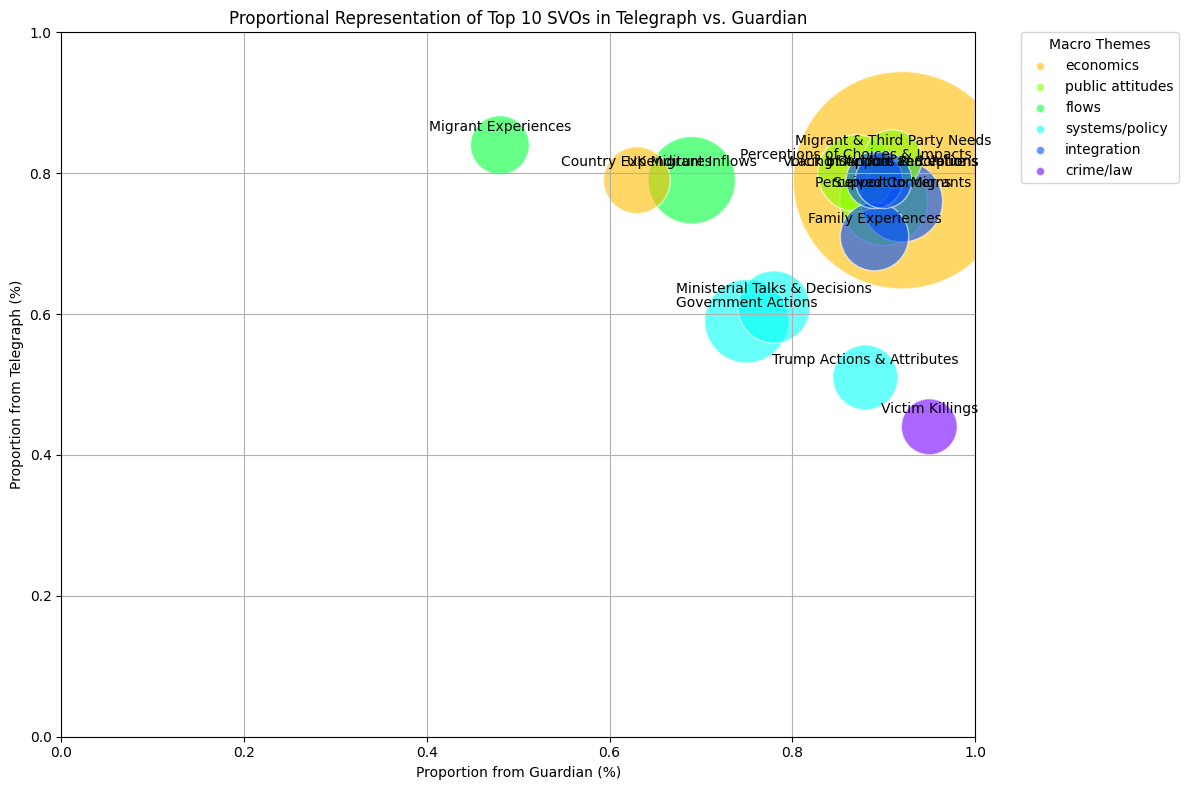

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from adjustText import adjust_text

# Create the plot
plt.figure(figsize=(12, 8))

# Scatter plot using the colors mapped in the DataFrame
scatter = plt.scatter(
    top_clusters['Effective_Guardian_prop'],
    top_clusters['Effective_Telegraph_prop'],
    s=top_clusters['n_articles']*3,
    color=top_clusters['color'],
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

# Set plot limits and calculate margins
x_margin = (top_clusters['Effective_Guardian_prop'].max() - top_clusters['Effective_Guardian_prop'].min()) * 0.1
y_margin = (top_clusters['Effective_Telegraph_prop'].max() - top_clusters['Effective_Telegraph_prop'].min()) * 0.1
plt.xlim(top_clusters['Effective_Guardian_prop'].min() - x_margin, top_clusters['Effective_Guardian_prop'].max() + x_margin)
plt.ylim(top_clusters['Effective_Telegraph_prop'].min() - y_margin, top_clusters['Effective_Telegraph_prop'].max() + y_margin)

# Adding labels and title
plt.xlabel('Proportion from Guardian (%)')
plt.ylabel('Proportion from Telegraph (%)')
plt.title('Proportional Representation of Top 10 SVOs in Telegraph vs. Guardian')
plt.grid(True)

# Add legend manually for each 'macro' category
for category, color in color_mapping.items():
    plt.scatter([], [], color=color, label=category, alpha=0.6, edgecolors='w', linewidth=1)

# Annotating each point with the first SVO
# for i, row in top_clusters.iterrows():
#     first_svo = row['Top_SVOs'].split('\n')[0]
#     plt.text(row['Effective_Guardian_prop'], row['Effective_Telegraph_prop'], first_svo, fontsize=9)
for index, row in top_clusters.iterrows():
    plt.annotate(
        row['title'], 
        (row['Effective_Guardian_prop'], row['Effective_Telegraph_prop']),
        textcoords="offset points",
        xytext=(0,10), 
        ha='center' 
    )


plt.xlim(0, 1)
plt.ylim(0, 1)

plt.legend(title='Macro Themes', loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Show plot
plt.tight_layout()
plt.show()


### Setting Visualization for GN-GS

In [17]:
result_df.columns

Index(['hdb_string_clusters', 'Top_SVOs', 'both', 'guardian', 'telegraph',
       'EU_Mentions', 'NonEU_Mentions', 'GN_Mentions', 'GS_Mentions',
       'Total_Count', 'n_articles', 'num_svos', 'macro', 'title',
       'Effective_Telegraph', 'Effective_Telegraph_prop', 'Effective_Guardian',
       'Effective_Guardian_prop'],
      dtype='object')

In [18]:
result_df['GN_prop'] = (result_df['GN_Mentions'])/(result_df['GN_Mentions'] + result_df['GS_Mentions'])
result_df['GS_prop'] = (result_df['GS_Mentions'])/(result_df['GN_Mentions'] + result_df['GS_Mentions'])

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#top_clusters = result_df.sort_values(by='n_articles', ascending=False).head(15)
palette = sns.color_palette("hsv", len(result_df['macro'].unique()))
color_mapping = {category: color for category, color in zip(result_df['macro'].unique(), palette)}
result_df['color'] = result_df['macro'].map(color_mapping)

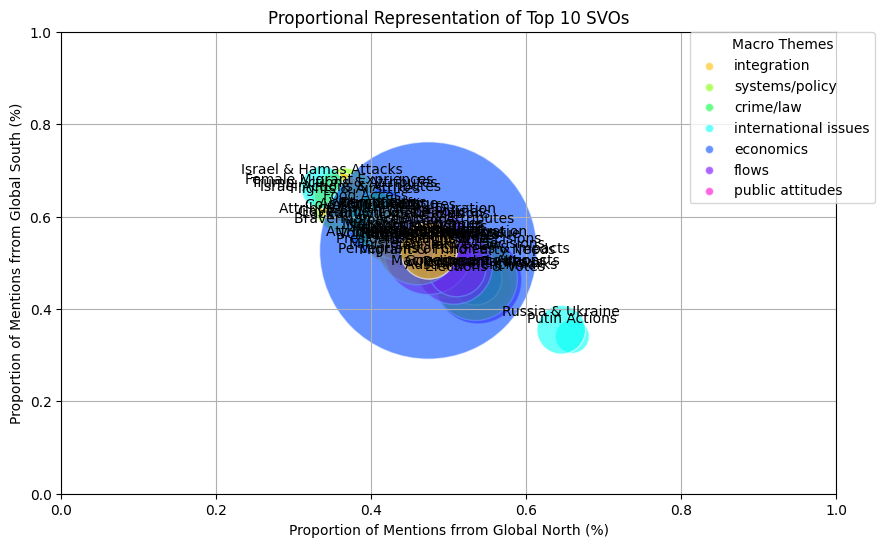

In [23]:
# Creating visualization
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import pandas as pd

# Assuming top_clusters is already set up correctly
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    result_df['GN_prop'],
    result_df['GS_prop'],
    s=result_df['n_articles'] * 3,
    color=result_df['color'],
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

# Adding labels and title
plt.xlabel('Proportion of Mentions from Global North Countries (%)')
plt.ylabel('Proportion of Mentions from Global South COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)

# Add legend manually for each 'macro' category
for category, color in color_mapping.items():
    plt.scatter([], [], color=color, label=category, alpha=0.6, edgecolors='w', linewidth=1)

for index, row in result_df.iterrows():
    plt.annotate(
        row['title'],
        (row['GN_prop'], row['GS_prop']),
        textcoords="offset points",
        xytext=(0,10), 
        ha='center'
    )
    
# # Use adjust_text to automatically adjust text positions
# adjust_text(
#     texts,
#     x=result_df['GN_prop'],
#     y=result_df['GS_prop'],
#     arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
#     #expand_text=(1.1, 1.5),  
#     #force_text=(0.5, 1.0),   
#     #force_points=(0.5, 1.0)  
# )

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.xlabel('Proportion of Mentions frrom Global North (%)')
plt.ylabel('Proportion of Mentions frrom Global South (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.legend(title='Macro Themes', loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

top_clusters = result_df.sort_values(by='n_articles', ascending=False).head(15)
palette = sns.color_palette("hsv", len(top_clusters['macro'].unique()))
color_mapping = {category: color for category, color in zip(top_clusters['macro'].unique(), palette)}
top_clusters['color'] = top_clusters['macro'].map(color_mapping)

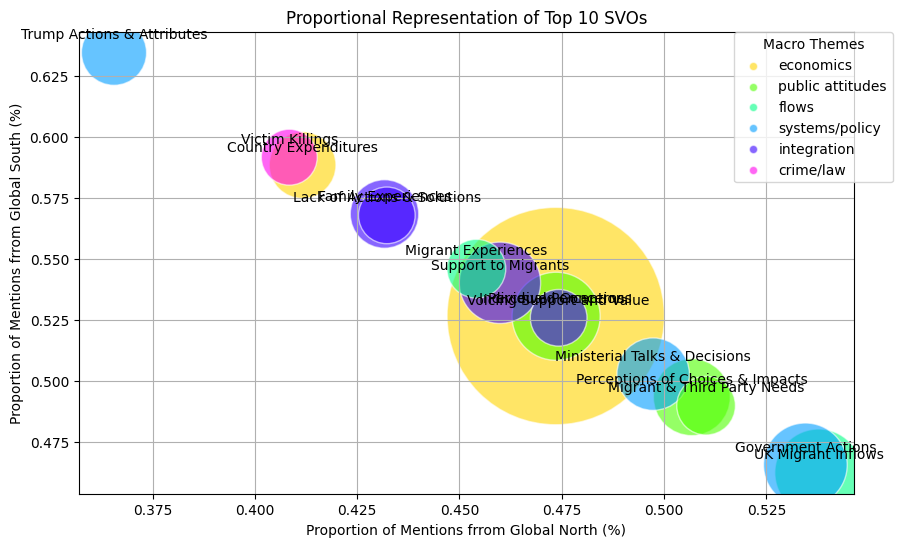

In [25]:
# Creating visualization
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import pandas as pd

# Assuming top_clusters is already set up correctly
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    top_clusters['GN_prop'],
    top_clusters['GS_prop'],
    s=top_clusters['n_articles'] * 3,
    color=top_clusters['color'],
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

# Adding labels and title
plt.xlabel('Proportion of Mentions from Global North Countries (%)')
plt.ylabel('Proportion of Mentions from Global South COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)

# Add legend manually for each 'macro' category
for category, color in color_mapping.items():
    plt.scatter([], [], color=color, label=category, alpha=0.6, edgecolors='w', linewidth=1)

for index, row in top_clusters.iterrows():
    plt.annotate(
        row['title'],
        (row['GN_prop'], row['GS_prop']),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

plt.xlabel('Proportion of Mentions frrom Global North (%)')
plt.ylabel('Proportion of Mentions frrom Global South (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.legend(title='Macro Themes', loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()


### EU versus non-EU 

In [21]:
result_df['EU_prop'] = (result_df['EU_Mentions'])/(result_df['EU_Mentions'] + result_df['NonEU_Mentions'])
result_df['nonEU_prop'] = (result_df['NonEU_Mentions'])/(result_df['EU_Mentions'] + result_df['NonEU_Mentions'])

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#top_clusters = result_df.sort_values(by='n_articles', ascending=False).head(15)
palette = sns.color_palette("hsv", len(result_df['macro'].unique()))
color_mapping = {category: color for category, color in zip(result_df['macro'].unique(), palette)}
result_df['color'] = result_df['macro'].map(color_mapping)

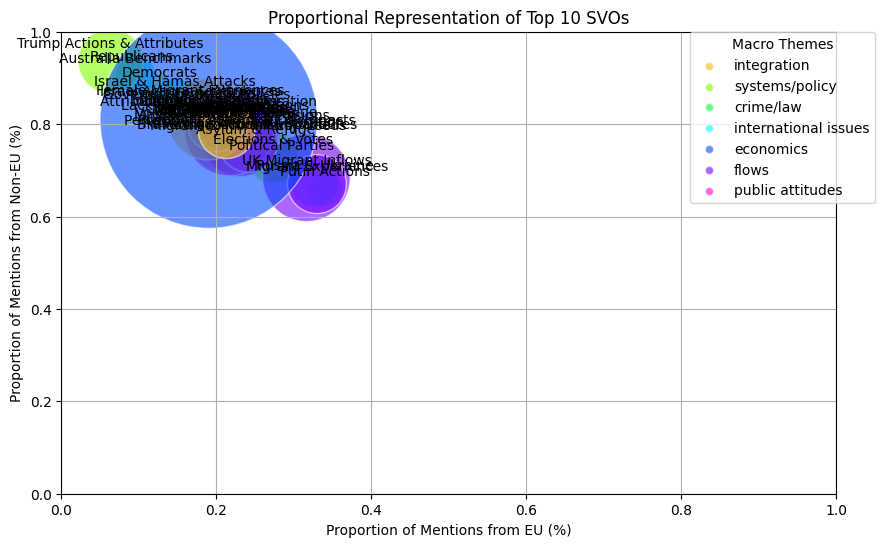

In [28]:
# Creating visualization
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import pandas as pd

# Assuming top_clusters is already set up correctly
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    result_df['EU_prop'],
    result_df['nonEU_prop'],
    s=result_df['n_articles'] * 3,
    color=result_df['color'],
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

# Adding labels and title
plt.xlabel('Proportion of Mentions from EU Countries (%)')
plt.ylabel('Proportion of Mentions from Non-EU COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)

# Add legend manually for each 'macro' category
for category, color in color_mapping.items():
    plt.scatter([], [], color=color, label=category, alpha=0.6, edgecolors='w', linewidth=1)

for index, row in result_df.iterrows():
    plt.annotate(
        row['title'],
        (row['EU_prop'], row['nonEU_prop']),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.xlabel('Proportion of Mentions from EU (%)')
plt.ylabel('Proportion of Mentions from Non-EU (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.legend(title='Macro Themes', loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

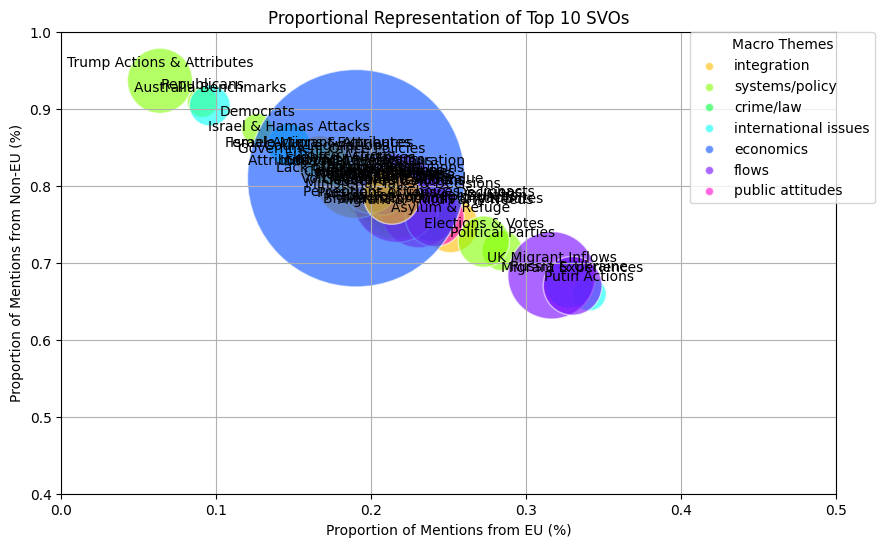

In [29]:
# Same as above with all clusters but shortening x axis for readability
# Creating visualization
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import pandas as pd

# Assuming top_clusters is already set up correctly
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    result_df['EU_prop'],
    result_df['nonEU_prop'],
    s=result_df['n_articles'] * 3,
    color=result_df['color'],
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

# Adding labels and title
plt.xlabel('Proportion of Mentions from EU Countries (%)')
plt.ylabel('Proportion of Mentions from Non-EU COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)

# Add legend manually for each 'macro' category
for category, color in color_mapping.items():
    plt.scatter([], [], color=color, label=category, alpha=0.6, edgecolors='w', linewidth=1)

for index, row in result_df.iterrows():
    plt.annotate(
        row['title'],
        (row['EU_prop'], row['nonEU_prop']),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

plt.xlim(0, 0.5)
plt.ylim(0.4, 1)

plt.xlabel('Proportion of Mentions from EU (%)')
plt.ylabel('Proportion of Mentions from Non-EU (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.legend(title='Macro Themes', loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

top_clusters = result_df.sort_values(by='n_articles', ascending=False).head(15)
palette = sns.color_palette("hsv", len(top_clusters['macro'].unique()))
color_mapping = {category: color for category, color in zip(top_clusters['macro'].unique(), palette)}
top_clusters['color'] = top_clusters['macro'].map(color_mapping)

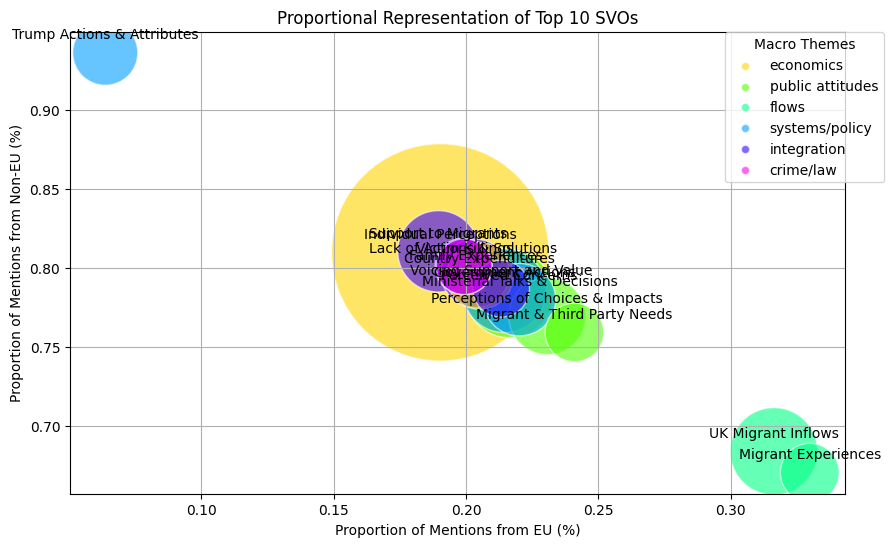

In [31]:
# Creating visualization
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import pandas as pd

# Assuming top_clusters is already set up correctly
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    top_clusters['EU_prop'],
    top_clusters['nonEU_prop'],
    s=top_clusters['n_articles'] * 3,
    color=top_clusters['color'],
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

# Adding labels and title
plt.xlabel('Proportion of Mentions from EU Countries (%)')
plt.ylabel('Proportion of Mentions from Non-EU COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)

# Add legend manually for each 'macro' category
for category, color in color_mapping.items():
    plt.scatter([], [], color=color, label=category, alpha=0.6, edgecolors='w', linewidth=1)

for index, row in top_clusters.iterrows():
    plt.annotate(
        row['title'],
        (row['EU_prop'], row['nonEU_prop']),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

plt.xlabel('Proportion of Mentions from EU (%)')
plt.ylabel('Proportion of Mentions from Non-EU (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.legend(title='Macro Themes', loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()


### Now adjusting color schemes to represent other things (dehumanization)

In [24]:
dehuman_llama = pd.read_csv('dehumanization_scores4')

In [25]:
import pandas as pd

dehuman = pd.read_csv('dehuman_bench.csv')

In [26]:
dehuman.columns

Index(['Unnamed: 0', 'hdb_string_clusters', 'Top_SVOs', 'both', 'guardian',
       'telegraph', 'Perspective(ws)', 'Perspective(wo)', 'Value(o)',
       'Value(s)', 'EU_Mentions', 'NonEU_Mentions', 'GN_Mentions',
       'GS_Mentions', 'Total_Count', 'n_articles', 'natural_count',
       'illegal_count', 'economic_count', 'object_count', 'numbers_count',
       'total_dictionaries'],
      dtype='object')

In [27]:
# Correcting the column list concatenation for the merge operation
columns_to_merge = ['Perspective(ws)', 'Perspective(wo)', 'Value(o)', 'Value(s)', 'total_dictionaries']
result_df = result_df.merge(dehuman[['hdb_string_clusters'] + columns_to_merge], 
                            on='hdb_string_clusters', 
                            how='left')


# Rename the 'predicted_score' column to 'dehuman_score' in 'top_clusters'
#result_df.rename(columns={'predicted_score': 'dehuman_score'}, inplace=True)

In [28]:
# for llama
result_df = result_df.merge(dehuman_llama[['hdb_string_clusters', 'predicted_score']], 
                                   on='hdb_string_clusters', 
                                   how='left')
result_df.rename(columns={'predicted_score': 'dehuman_score'}, inplace=True)

In [29]:
result_df.columns

Index(['hdb_string_clusters', 'Top_SVOs', 'both', 'guardian', 'telegraph',
       'EU_Mentions', 'NonEU_Mentions', 'GN_Mentions', 'GS_Mentions',
       'Total_Count', 'n_articles', 'num_svos', 'macro', 'title',
       'Effective_Telegraph', 'Effective_Telegraph_prop', 'Effective_Guardian',
       'Effective_Guardian_prop', 'GN_prop', 'GS_prop', 'color', 'EU_prop',
       'nonEU_prop', 'Perspective(ws)', 'Perspective(wo)', 'Value(o)',
       'Value(s)', 'total_dictionaries', 'dehuman_score'],
      dtype='object')

In [30]:
import pandas as pd

columns_to_merge = ['Perspective(ws)', 'Perspective(wo)', 'Value(o)', 'Value(s)', 'total_dictionaries']
top_clusters = top_clusters.merge(dehuman[['hdb_string_clusters'] + columns_to_merge], 
                            on='hdb_string_clusters', 
                            how='left')

# top_clusters = top_clusters.merge(dehuman[['hdb_string_clusters', 'predicted_score']], 
#                                   on='hdb_string_clusters', 
#                                   how='left')
#top_clusters.rename(columns={'predicted_score': 'dehuman_score'}, inplace=True)
top_clusters

hdb_string_clusters                                           Top_SVOs  \
0                    41  people have right\nthat s i\nwe have those\nwe...   
1                    36  people raise concern\npeople have problem\nwe ...   
2                    22  you want change\nauthority reach uk\nbill put ...   
3                    33  government introduce system\ngovernment introd...   
4                    38  you thank you\nbiden have respect\ni accept th...   
5                    35  people have choice\nthose have choice\nthose h...   
6                    26  he become minister\ni ask minister\nminister t...   
7                    25  you tell family\napplication have family\nauth...   
8                     6  government pay million\ngovernment spend billi...   
9                    11  trump call what\ntrump face charge\ntrump orde...   
10                   23  migrant cross channel\nmigrant show migrant\nt...   
11                   37  you need thing\nconcern require consideration\...   
12                   42  you see lot\nwhich generate lot\nwhich get lot...   
13                   40  government do nothing\npeople do nothing\nwe n...   
14                   27  people kill people\nwho kill father\nstrike ki...   

    both  guardian  telegraph  EU_Mentions  NonEU_Mentions  GN_Mentions  \
0   0.71      0.21       0.08        10216           43482        20371   
1   0.66      0.24       0.10         1779            6442         3177   
2   0.48      0.21       0.31         2736            5913         3882   
3   0.35      0.40       0.24         1661            6081         3328   
4   0.68      0.24       0.08         1516            6481         2981   
5   0.67      0.20       0.13         1665            5553         2954   
6   0.39      0.39       0.22         1896            6714         3447   
7   0.60      0.29       0.11          943            3690         1668   
8   0.42      0.21       0.37         1191            4614         1985   
9   0.39      0.49       0.12          318            4676         1289   
10  0.32      0.16       0.52          799            1623          975   
11  0.73      0.18       0.09          866            2728         1467   
12  0.68      0.21       0.11          711            2623         1261   
13  0.69      0.21       0.10          636            2559         1126   
14  0.38      0.57       0.06         1815            7291         3168   

    GS_Mentions  Total_Count  ...   GN_prop   GS_prop  \
0         22649         8778  ...  0.473524  0.526476   
1          3531         1408  ...  0.473614  0.526386   
2          3337         1402  ...  0.537748  0.462252   
3          2898         1270  ...  0.534533  0.465467   
4          3501         1214  ...  0.459889  0.540111   
5          2875         1084  ...  0.506776  0.493224   
6          3484          997  ...  0.497331  0.502669   
7          2196          857  ...  0.431677  0.568323   
8          2837          831  ...  0.411655  0.588345   
9          2237          820  ...  0.365570  0.634430   
10         1172          609  ...  0.454122  0.545878   
11         1408          622  ...  0.510261  0.489739   
12         1398          585  ...  0.474238  0.525762   
13         1479          582  ...  0.432246  0.567754   
14         4589          682  ...  0.408405  0.591595   

                             color   EU_prop  nonEU_prop  Perspective(ws)  \
0   (1.0, 0.8338243632361279, 0.0)  0.190249    0.809751             0.34   
1    (0.309189485660074, 1.0, 0.0)  0.216397    0.783603             0.19   
2   (0.0, 1.0, 0.5246319661417559)  0.316337    0.683663             0.34   
3   (0.0, 0.6183848775760541, 1.0)  0.214544    0.785456             0.33   
4   (0.2154394856600736, 0.0, 1.0)  0.189571    0.810429             0.54   
5    (0.309189485660074, 1.0, 0.0)  0.230673    0.769327             0.32   
6   (0.0, 0.6183848775760541, 1.0)  0.220209    0.779791             0.26   
7   (0.2154394856600736, 

In [31]:
# for llama
top_clusters = top_clusters.merge(dehuman_llama[['hdb_string_clusters', 'predicted_score']], 
                                   on='hdb_string_clusters', 
                                   how='left')
top_clusters.rename(columns={'predicted_score': 'dehuman_score'}, inplace=True)

In [32]:
result_df = result_df.loc[:, ~result_df.columns.duplicated()]

In [33]:
result_df.columns

Index(['hdb_string_clusters', 'Top_SVOs', 'both', 'guardian', 'telegraph',
       'EU_Mentions', 'NonEU_Mentions', 'GN_Mentions', 'GS_Mentions',
       'Total_Count', 'n_articles', 'num_svos', 'macro', 'title',
       'Effective_Telegraph', 'Effective_Telegraph_prop', 'Effective_Guardian',
       'Effective_Guardian_prop', 'GN_prop', 'GS_prop', 'color', 'EU_prop',
       'nonEU_prop', 'Perspective(ws)', 'Perspective(wo)', 'Value(o)',
       'Value(s)', 'total_dictionaries', 'dehuman_score'],
      dtype='object')

In [36]:
top_clusters.columns

Index(['hdb_string_clusters', 'Top_SVOs', 'both', 'guardian', 'telegraph',
       'EU_Mentions', 'NonEU_Mentions', 'GN_Mentions', 'GS_Mentions',
       'Total_Count', 'n_articles', 'num_svos', 'macro', 'title',
       'Effective_Telegraph', 'Effective_Telegraph_prop', 'Effective_Guardian',
       'Effective_Guardian_prop', 'GN_prop', 'GS_prop', 'color', 'EU_prop',
       'nonEU_prop', 'Perspective(ws)', 'Perspective(wo)', 'Value(o)',
       'Value(s)', 'total_dictionaries', 'dehuman_score'],
      dtype='object')

Min dehumanization score: -0.65
Max dehumanization score: 0.54


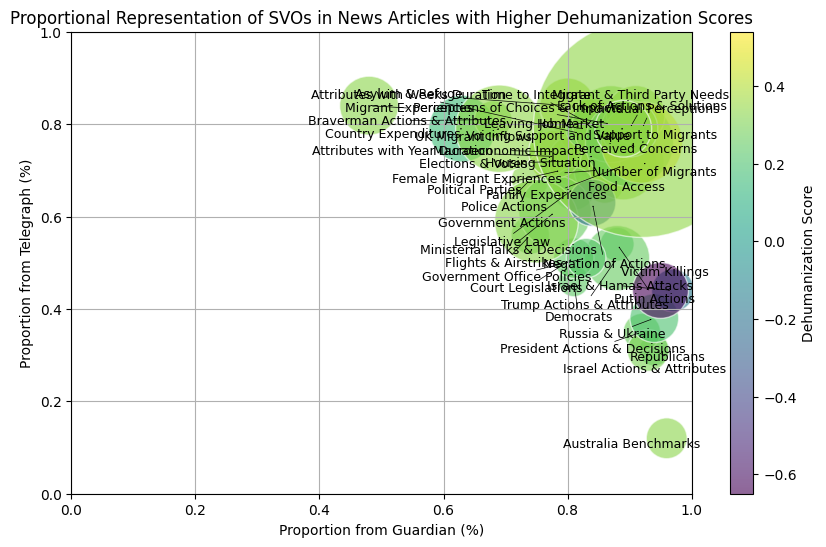

In [35]:
# Showing all clusters with the annotated verbs (Perspective(ws))

import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text

# Ensure dehuman_score is numeric and handle NaNs
result_df['Perspective(ws)'] = pd.to_numeric(result_df['Perspective(ws)'], errors='coerce')

# Filter to only include rows with dehuman_score greater than 0.5

# Check the min and max values in the filtered dataframe
dehuman_score_min = result_df['Perspective(ws)'].min()
dehuman_score_max = result_df['Perspective(ws)'].max()
print("Min dehumanization score:", dehuman_score_min)
print("Max dehumanization score:", dehuman_score_max)

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')

scatter = plt.scatter(
        result_df['Effective_Guardian_prop'],
        result_df['Effective_Telegraph_prop'],
        s=result_df['n_articles']*3,  # Adjust size for visibility
        c=result_df['Perspective(ws)'],  
        cmap=cmap, 
        norm=norm,  # Apply normalization
        alpha=0.6,
        edgecolors='w',
        linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in result_df.iterrows():
    text = plt.text(
        row['Effective_Guardian_prop'], 
        row['Effective_Telegraph_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# Use adjust_text to automatically adjust text positions
adjust_text(
    texts,
    x=result_df['Effective_Guardian_prop'],
    y=result_df['Effective_Telegraph_prop'],
    arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
    #expand_text=(1.1, 1.5),  
    #force_text=(0.5, 1.0),   
    #force_points=(0.5, 1.0)  
)


plt.xlim(0, 1)
plt.ylim(0, 1)

    # Adding labels and title
plt.xlabel('Proportion from Guardian (%)')
plt.ylabel('Proportion from Telegraph (%)')
plt.title('Proportional Representation of SVOs in News Articles with Higher Dehumanization Scores')
plt.grid(True)
plt.show()

Min dehumanization score: 0.2
Max dehumanization score: 0.93


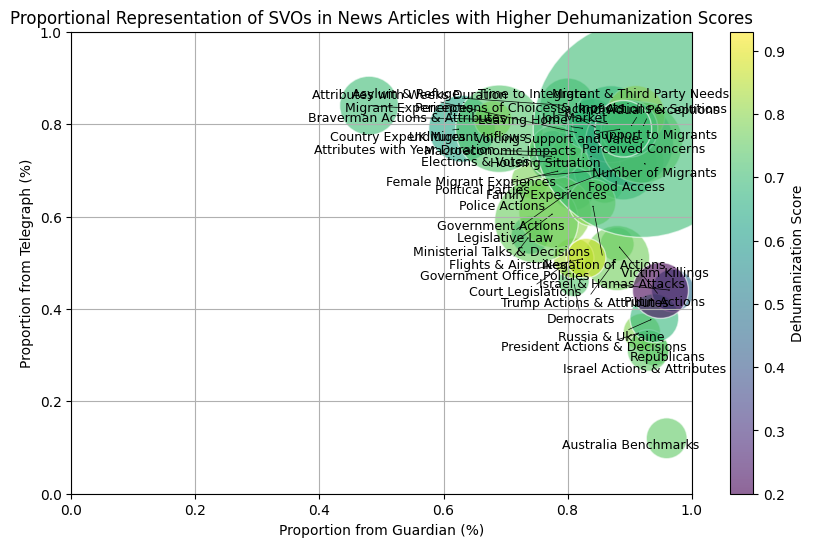

In [32]:
# Showing all clusters with the annotated verbs- Value(s)

import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text

# Ensure dehuman_score is numeric and handle NaNs
result_df['Value(s)'] = pd.to_numeric(result_df['Value(s)'], errors='coerce')

# Filter to only include rows with dehuman_score greater than 0.5

# Check the min and max values in the filtered dataframe
dehuman_score_min = result_df['Value(s)'].min()
dehuman_score_max = result_df['Value(s)'].max()
print("Min dehumanization score:", dehuman_score_min)
print("Max dehumanization score:", dehuman_score_max)

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')

scatter = plt.scatter(
        result_df['Effective_Guardian_prop'],
        result_df['Effective_Telegraph_prop'],
        s=result_df['n_articles']*3,  # Adjust size for visibility
        c=result_df['Value(s)'],  
        cmap=cmap, 
        norm=norm,  # Apply normalization
        alpha=0.6,
        edgecolors='w',
        linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in result_df.iterrows():
    text = plt.text(
        row['Effective_Guardian_prop'], 
        row['Effective_Telegraph_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# Use adjust_text to automatically adjust text positions
adjust_text(
    texts,
    x=result_df['Effective_Guardian_prop'],
    y=result_df['Effective_Telegraph_prop'],
    arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
    #expand_text=(1.1, 1.5),  
    #force_text=(0.5, 1.0),   
    #force_points=(0.5, 1.0)  
)


plt.xlim(0, 1)
plt.ylim(0, 1)

    # Adding labels and title
plt.xlabel('Proportion from Guardian (%)')
plt.ylabel('Proportion from Telegraph (%)')
plt.title('Proportional Representation of SVOs in News Articles with Higher Dehumanization Scores')
plt.grid(True)
plt.show()

Min dehumanization score: 0
Max dehumanization score: 265


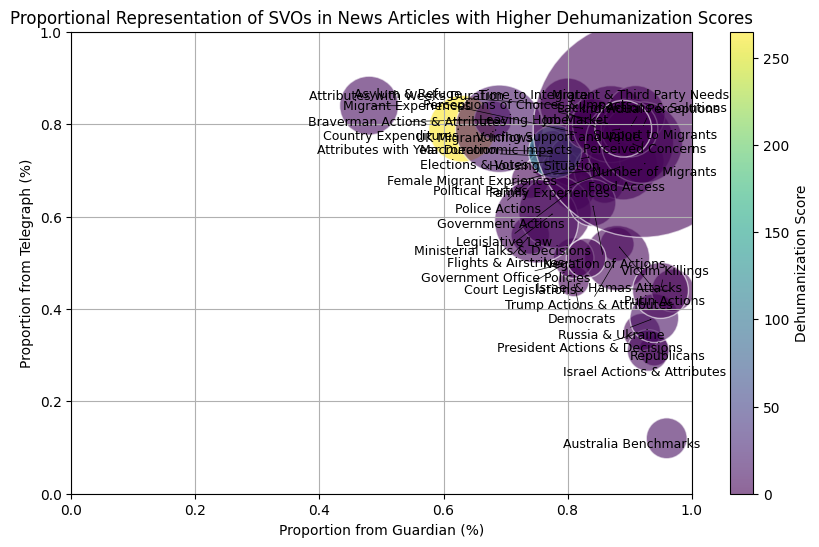

In [33]:
# Showing all clusters with the llama predictions

import matplotlib.pyplot as plt
import pandas as pd

# Ensure dehuman_score is numeric and handle NaNs
result_df['total_dictionaries'] = pd.to_numeric(result_df['total_dictionaries'], errors='coerce')
#result_df.dropna(subset=['dehuman_score'], inplace=True)

# Filter to only include rows with dehuman_score greater than 0.5

# Check the min and max values in the filtered dataframe
dehuman_score_min = result_df['total_dictionaries'].min()
dehuman_score_max = result_df['total_dictionaries'].max()
print("Min dehumanization score:", dehuman_score_min)
print("Max dehumanization score:", dehuman_score_max)

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')

scatter = plt.scatter(
        result_df['Effective_Guardian_prop'],
        result_df['Effective_Telegraph_prop'],
        s=result_df['n_articles']*3,  # Adjust size for visibility
        c=result_df['total_dictionaries'],  
        cmap=cmap, 
        norm=norm,  # Apply normalization
        alpha=0.6,
        edgecolors='w',
        linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in result_df.iterrows():
    text = plt.text(
        row['Effective_Guardian_prop'], 
        row['Effective_Telegraph_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# Use adjust_text to automatically adjust text positions
adjust_text(
    texts,
    x=result_df['Effective_Guardian_prop'],
    y=result_df['Effective_Telegraph_prop'],
    arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
    #expand_text=(1.1, 1.5),  
    #force_text=(0.5, 1.0),   
    #force_points=(0.5, 1.0)  
)


plt.xlim(0, 1)
plt.ylim(0, 1)

    # Adding labels and title
plt.xlabel('Proportion from Guardian (%)')
plt.ylabel('Proportion from Telegraph (%)')
plt.title('Proportional Representation of SVOs in News Articles with Higher Dehumanization Scores')
plt.grid(True)
plt.show()


Min dehumanization score: -0.89
Max dehumanization score: 0.15


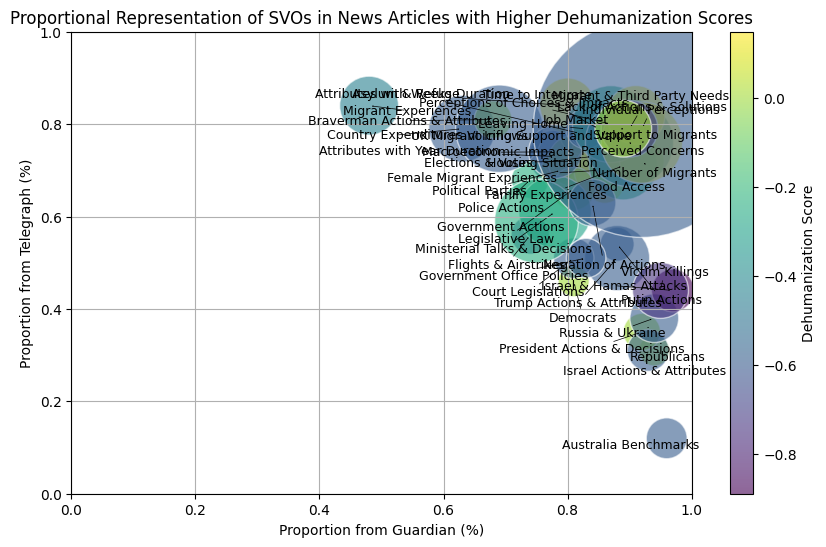

In [93]:
# Showing all clusters with the llama predictions

import matplotlib.pyplot as plt
import pandas as pd

# Ensure dehuman_score is numeric and handle NaNs
result_df['dehuman_score'] = pd.to_numeric(result_df['dehuman_score'], errors='coerce')
result_df.dropna(subset=['dehuman_score'], inplace=True)

# Filter to only include rows with dehuman_score greater than 0.5

# Check the min and max values in the filtered dataframe
dehuman_score_min = result_df['dehuman_score'].min()
dehuman_score_max = result_df['dehuman_score'].max()
print("Min dehumanization score:", dehuman_score_min)
print("Max dehumanization score:", dehuman_score_max)

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')

scatter = plt.scatter(
        result_df['Effective_Guardian_prop'],
        result_df['Effective_Telegraph_prop'],
        s=result_df['n_articles']*3,  # Adjust size for visibility
        c=result_df['dehuman_score'],  
        cmap=cmap, 
        norm=norm,  # Apply normalization
        alpha=0.6,
        edgecolors='w',
        linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in result_df.iterrows():
    text = plt.text(
        row['Effective_Guardian_prop'], 
        row['Effective_Telegraph_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# Use adjust_text to automatically adjust text positions
adjust_text(
    texts,
    x=result_df['Effective_Guardian_prop'],
    y=result_df['Effective_Telegraph_prop'],
    arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
    #expand_text=(1.1, 1.5),  
    #force_text=(0.5, 1.0),   
    #force_points=(0.5, 1.0)  
)


plt.xlim(0, 1)
plt.ylim(0, 1)

    # Adding labels and title
plt.xlabel('Proportion from Guardian (%)')
plt.ylabel('Proportion from Telegraph (%)')
plt.title('Proportional Representation of SVOs in News Articles with Higher Dehumanization Scores')
plt.grid(True)
plt.show()


In [36]:
result_df.columns

Index(['hdb_string_clusters', 'Top_SVOs', 'both', 'guardian', 'telegraph',
       'EU_Mentions', 'NonEU_Mentions', 'GN_Mentions', 'GS_Mentions',
       'Total_Count', 'n_articles', 'num_svos', 'macro', 'title',
       'Effective_Telegraph', 'Effective_Telegraph_prop', 'Effective_Guardian',
       'Effective_Guardian_prop', 'GN_prop', 'GS_prop', 'EU_prop',
       'nonEU_prop', 'Perspective(ws)_x', 'Perspective(wo)_x', 'Value(o)_x',
       'Value(s)_x', 'Perspective(ws)_y', 'Perspective(wo)_y', 'Value(o)_y',
       'Value(s)_y', 'total_dictionaries'],
      dtype='object')

Min dehumanization score: -0.65
Max dehumanization score: -0.16


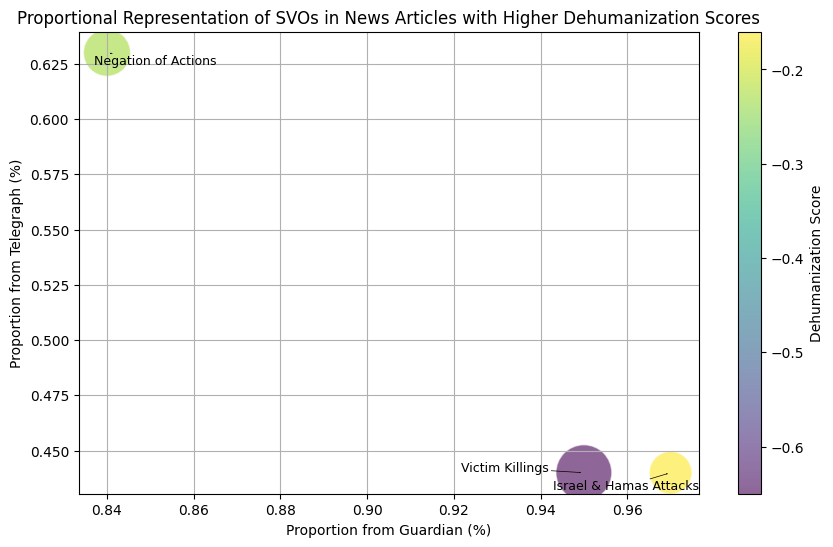

In [43]:
# Guardian - Telegraph on clusters with dehuman_score<-0.5-- Perspective
import matplotlib.pyplot as plt
import pandas as pd

# Ensure dehuman_score is numeric and handle NaNs
result_df['Perspective(ws)'] = pd.to_numeric(result_df['Perspective(ws)'], errors='coerce')
result_df.dropna(subset=['Perspective(ws)'], inplace=True)

# Filter to only include rows with dehuman_score greater than 0.5
filtered_df = result_df[result_df['Perspective(ws)_x'] <-0.1]

# Check the min and max values in the filtered dataframe
dehuman_score_min = filtered_df['Perspective(ws)'].min()
dehuman_score_max = filtered_df['Perspective(ws)'].max()
print("Min dehumanization score:", dehuman_score_min)
print("Max dehumanization score:", dehuman_score_max)

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')

scatter = plt.scatter(
        filtered_df['Effective_Guardian_prop'],
        filtered_df['Effective_Telegraph_prop'],
        s=filtered_df['n_articles']*3,  
        c=filtered_df['Perspective(ws)'],  
        cmap=cmap, 
        norm=norm, 
        alpha=0.6,
        edgecolors='w',
        linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in filtered_df.iterrows():
    text = plt.text(
        row['Effective_Guardian_prop'], 
        row['Effective_Telegraph_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# Use adjust_text to automatically adjust text positions
adjust_text(
    texts,
    x=result_df['Effective_Guardian_prop'],
    y=result_df['Effective_Telegraph_prop'],
    arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
    #expand_text=(1.1, 1.5),  
    #force_text=(0.5, 1.0),   
    #force_points=(0.5, 1.0)  
)


    # Adding labels and title
plt.xlabel('Proportion from Guardian (%)')
plt.ylabel('Proportion from Telegraph (%)')
plt.title('Proportional Representation of SVOs in News Articles with Higher Dehumanization Scores')
plt.grid(True)
plt.show()


Min dehumanization score: nan
Max dehumanization score: nan


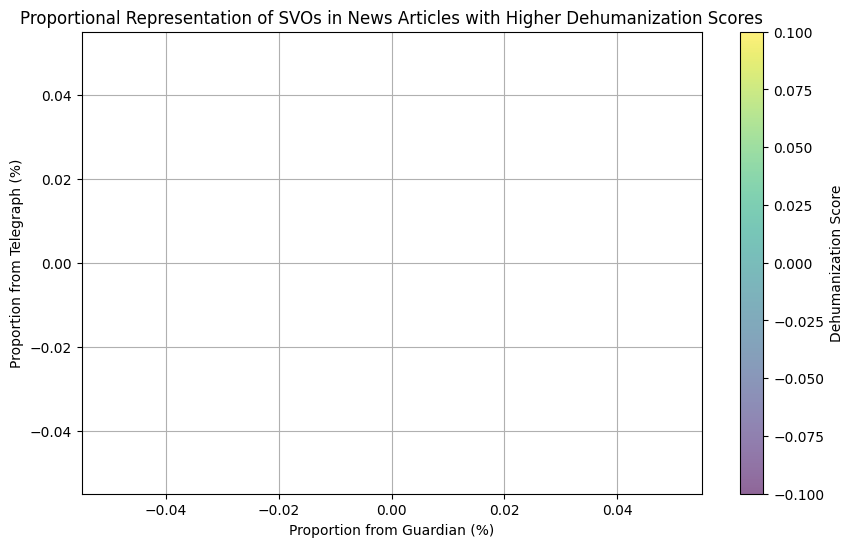

In [44]:
# Guardian - Telegraph on clusters with dehuman_score<-0.5-- Value
import matplotlib.pyplot as plt
import pandas as pd

# Ensure dehuman_score is numeric and handle NaNs
result_df['Value(s)'] = pd.to_numeric(result_df['Value(s)'], errors='coerce')
result_df.dropna(subset=['Value(s)'], inplace=True)

# Filter to only include rows with dehuman_score greater than 0.5
filtered_df = result_df[result_df['Value(s)'] <0]

# Check the min and max values in the filtered dataframe
dehuman_score_min = filtered_df['Value(s)'].min()
dehuman_score_max = filtered_df['Value(s)'].max()
print("Min dehumanization score:", dehuman_score_min)
print("Max dehumanization score:", dehuman_score_max)

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')

scatter = plt.scatter(
        filtered_df['Effective_Guardian_prop'],
        filtered_df['Effective_Telegraph_prop'],
        s=filtered_df['n_articles']*3,  
        c=filtered_df['Value(s)'],  
        cmap=cmap, 
        norm=norm, 
        alpha=0.6,
        edgecolors='w',
        linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in filtered_df.iterrows():
    text = plt.text(
        row['Effective_Guardian_prop'], 
        row['Effective_Telegraph_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# Use adjust_text to automatically adjust text positions
adjust_text(
    texts,
    x=result_df['Effective_Guardian_prop'],
    y=result_df['Effective_Telegraph_prop'],
    arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
    #expand_text=(1.1, 1.5),  
    #force_text=(0.5, 1.0),   
    #force_points=(0.5, 1.0)  
)


    # Adding labels and title
plt.xlabel('Proportion from Guardian (%)')
plt.ylabel('Proportion from Telegraph (%)')
plt.title('Proportional Representation of SVOs in News Articles with Higher Dehumanization Scores')
plt.grid(True)
plt.show()


Min dehumanization score: 116
Max dehumanization score: 265


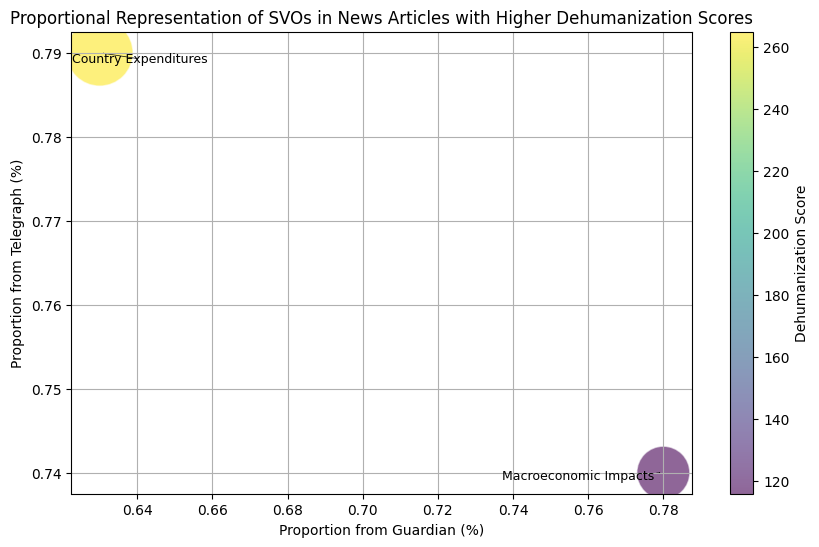

In [47]:
# Guardian - Telegraph on clusters with dehuman_score<-0.5-- dictionary
import matplotlib.pyplot as plt
import pandas as pd

# Ensure dehuman_score is numeric and handle NaNs
result_df['total_dictionaries'] = pd.to_numeric(result_df['total_dictionaries'], errors='coerce')
#result_df.dropna(subset=['dehuman_score'], inplace=True)

# Filter to only include rows with dehuman_score greater than 0.5
filtered_df = result_df[result_df['total_dictionaries'] > 20]

# Check the min and max values in the filtered dataframe
dehuman_score_min = filtered_df['total_dictionaries'].min()
dehuman_score_max = filtered_df['total_dictionaries'].max()
print("Min dehumanization score:", dehuman_score_min)
print("Max dehumanization score:", dehuman_score_max)

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')

scatter = plt.scatter(
        filtered_df['Effective_Guardian_prop'],
        filtered_df['Effective_Telegraph_prop'],
        s=filtered_df['n_articles']*3,  
        c=filtered_df['total_dictionaries'],  
        cmap=cmap, 
        norm=norm, 
        alpha=0.6,
        edgecolors='w',
        linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in filtered_df.iterrows():
    text = plt.text(
        row['Effective_Guardian_prop'], 
        row['Effective_Telegraph_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# Use adjust_text to automatically adjust text positions
adjust_text(
    texts,
    x=result_df['Effective_Guardian_prop'],
    y=result_df['Effective_Telegraph_prop'],
    arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
    #expand_text=(1.1, 1.5),  
    #force_text=(0.5, 1.0),   
    #force_points=(0.5, 1.0)  
)


    # Adding labels and title
plt.xlabel('Proportion from Guardian (%)')
plt.ylabel('Proportion from Telegraph (%)')
plt.title('Proportional Representation of SVOs in News Articles with Higher Dehumanization Scores')
plt.grid(True)
plt.show()


Min dehumanization score: -0.89
Max dehumanization score: -0.59


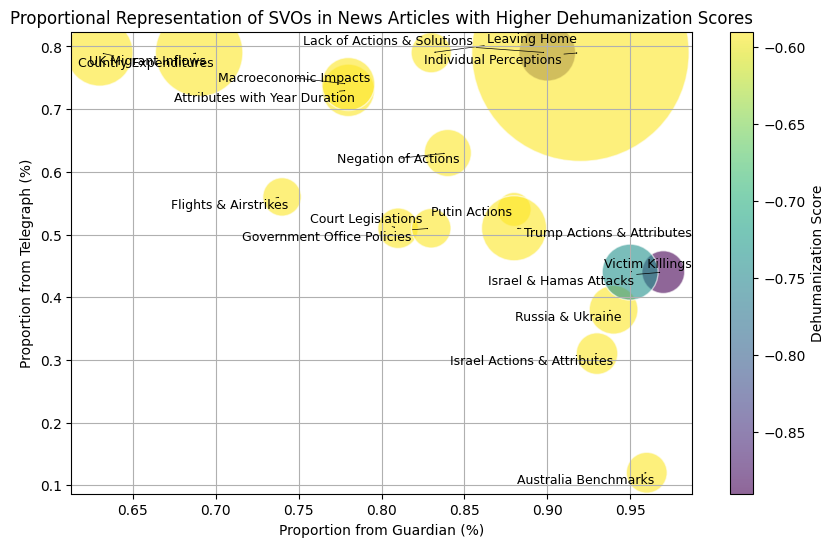

In [94]:
# Guardian - Telegraph on clusters with dehuman_score<-0.5-- llama predictions
import matplotlib.pyplot as plt
import pandas as pd

# Ensure dehuman_score is numeric and handle NaNs
result_df['dehuman_score'] = pd.to_numeric(result_df['dehuman_score'], errors='coerce')
result_df.dropna(subset=['dehuman_score'], inplace=True)

# Filter to only include rows with dehuman_score greater than 0.5
filtered_df = result_df[result_df['dehuman_score'] <-0.5]

# Check the min and max values in the filtered dataframe
dehuman_score_min = filtered_df['dehuman_score'].min()
dehuman_score_max = filtered_df['dehuman_score'].max()
print("Min dehumanization score:", dehuman_score_min)
print("Max dehumanization score:", dehuman_score_max)

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')

scatter = plt.scatter(
        filtered_df['Effective_Guardian_prop'],
        filtered_df['Effective_Telegraph_prop'],
        s=filtered_df['n_articles']*3,  
        c=filtered_df['dehuman_score'],  
        cmap=cmap, 
        norm=norm, 
        alpha=0.6,
        edgecolors='w',
        linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in filtered_df.iterrows():
    text = plt.text(
        row['Effective_Guardian_prop'], 
        row['Effective_Telegraph_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# Use adjust_text to automatically adjust text positions
adjust_text(
    texts,
    x=top_clusters['Effective_Guardian_prop'],
    y=top_clusters['Effective_Telegraph_prop'],
    arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
    #expand_text=(1.1, 1.5),  
    #force_text=(0.5, 1.0),   
    #force_points=(0.5, 1.0)  
)


    # Adding labels and title
plt.xlabel('Proportion from Guardian (%)')
plt.ylabel('Proportion from Telegraph (%)')
plt.title('Proportional Representation of SVOs in News Articles with Higher Dehumanization Scores')
plt.grid(True)
plt.show()


In [38]:
top_clusters = top_clusters.loc[:, ~top_clusters.columns.duplicated()]

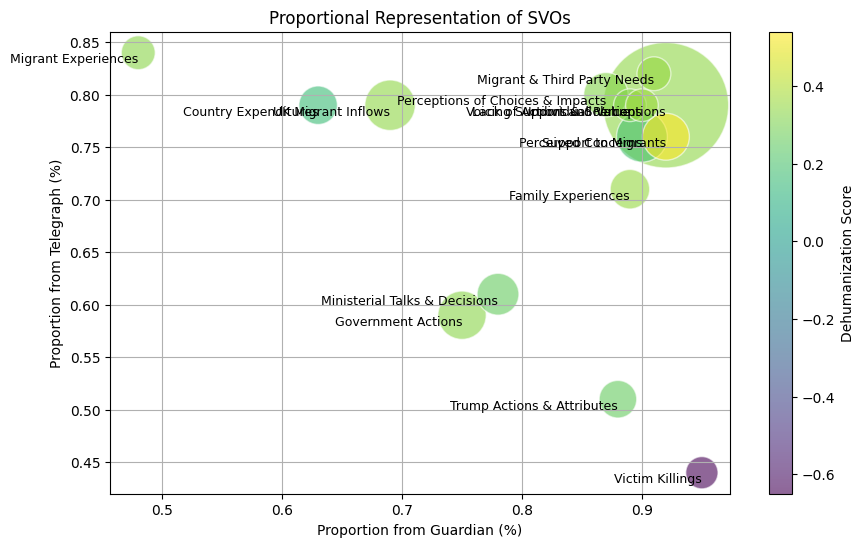

In [48]:
# Telegraph - Guardian Visualization, on top clusters-- Perspective
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(top_clusters['Perspective(ws)'].min(), top_clusters['Perspective(ws)'].max())
cmap = plt.get_cmap('viridis')  # Using plt.get_cmap instead of matplotlib.cm.get_cmap

# Scatter plot
scatter = plt.scatter(
    top_clusters['Effective_Guardian_prop'],
    top_clusters['Effective_Telegraph_prop'],
    s=top_clusters['n_articles'], 
    c=top_clusters['Perspective(ws)'],  
    cmap=cmap, 
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

texts = []
for i, row in top_clusters.iterrows():
    text = plt.text(
        row['Effective_Guardian_prop'], 
        row['Effective_Telegraph_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

# Adding labels and title
plt.xlabel('Proportion from Guardian (%)')
plt.ylabel('Proportion from Telegraph (%)')
plt.title('Proportional Representation of SVOs')
plt.grid(True)


# Show plot
plt.show()


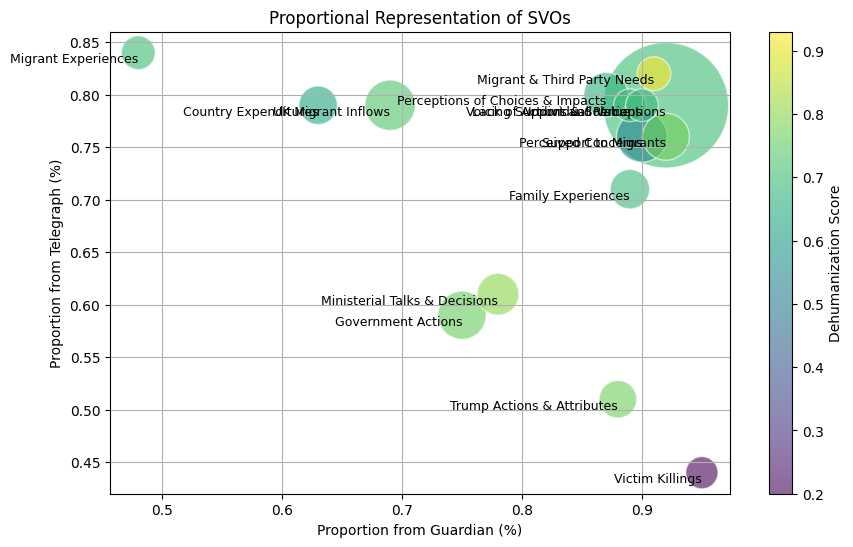

In [49]:
# Telegraph - Guardian Visualization, on top clusters-- Value
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(top_clusters['Value(s)'].min(), top_clusters['Value(s)'].max())
cmap = plt.get_cmap('viridis')  # Using plt.get_cmap instead of matplotlib.cm.get_cmap

# Scatter plot
scatter = plt.scatter(
    top_clusters['Effective_Guardian_prop'],
    top_clusters['Effective_Telegraph_prop'],
    s=top_clusters['n_articles'], 
    c=top_clusters['Value(s)'],  
    cmap=cmap, 
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

texts = []
for i, row in top_clusters.iterrows():
    text = plt.text(
        row['Effective_Guardian_prop'], 
        row['Effective_Telegraph_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

# Adding labels and title
plt.xlabel('Proportion from Guardian (%)')
plt.ylabel('Proportion from Telegraph (%)')
plt.title('Proportional Representation of SVOs')
plt.grid(True)


# Show plot
plt.show()


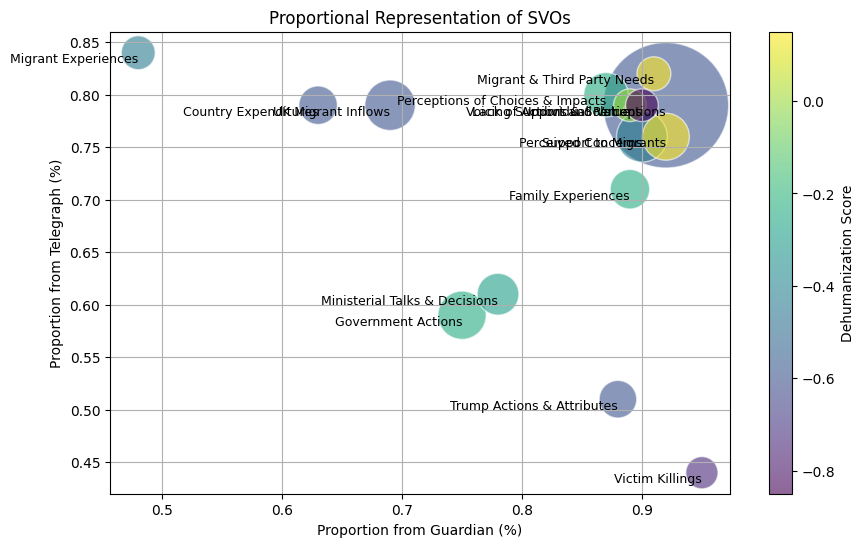

In [95]:
# Telegraph - Guardian Visualization, on top clusters-- llama
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(top_clusters['dehuman_score'].min(), top_clusters['dehuman_score'].max())
cmap = plt.get_cmap('viridis')  # Using plt.get_cmap instead of matplotlib.cm.get_cmap

# Scatter plot
scatter = plt.scatter(
    top_clusters['Effective_Guardian_prop'],
    top_clusters['Effective_Telegraph_prop'],
    s=top_clusters['n_articles'], 
    c=top_clusters['dehuman_score'],  
    cmap=cmap, 
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

texts = []
for i, row in top_clusters.iterrows():
    text = plt.text(
        row['Effective_Guardian_prop'], 
        row['Effective_Telegraph_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

# Adding labels and title
plt.xlabel('Proportion from Guardian (%)')
plt.ylabel('Proportion from Telegraph (%)')
plt.title('Proportional Representation of SVOs')
plt.grid(True)


# Show plot
plt.show()


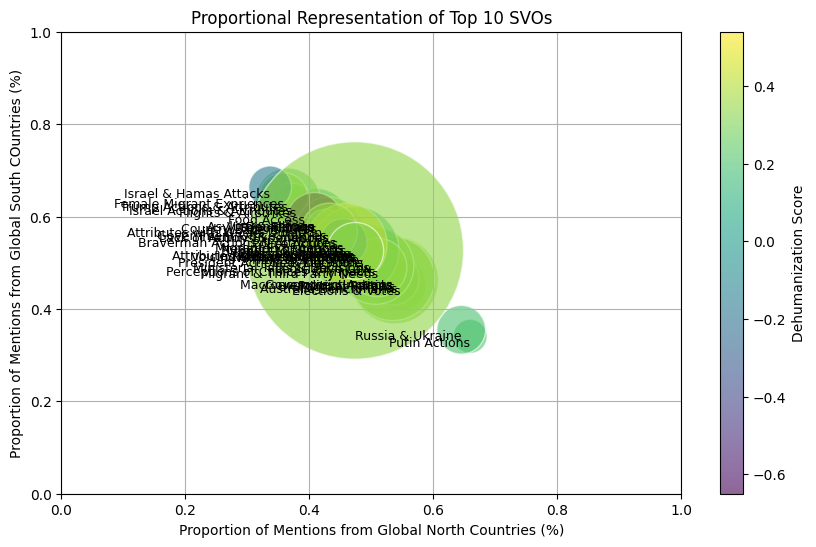

In [50]:
# Visualization of all clusters--Perspective
# GN - GS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(result_df['Perspective(ws)'].min(), result_df['Perspective(ws)'].max())
cmap = plt.get_cmap('viridis')  # Using plt.get_cmap instead of matplotlib.cm.get_cmap

# Scatter plot
scatter = plt.scatter(
    result_df['GN_prop'],
    result_df['GS_prop'],
    s=result_df['n_articles']*3,  # Size based on 'n_articles'
    c=result_df['Perspective(ws)'],  # Color based on 'dehuman_score'
    cmap=cmap,  # Using the viridis colormap
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

# Adding labels and title
plt.xlabel('Proportion of Mentions from Global North Countries (%)')
plt.ylabel('Proportion of Mentions from Global South COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)


# Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in result_df.iterrows():
    text = plt.text(
        row['GN_prop'], 
        row['GS_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

plt.xlim(0, 1)
plt.ylim(0, 1)

# Show plot
plt.show()

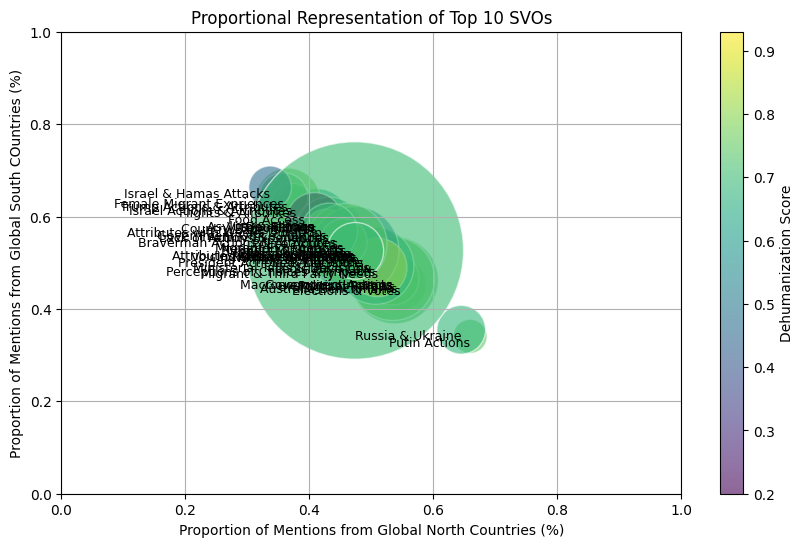

In [51]:
# Visualization of all clusters--Perspective
# GN - GS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(result_df['Value(s)'].min(), result_df['Value(s)'].max())
cmap = plt.get_cmap('viridis')  # Using plt.get_cmap instead of matplotlib.cm.get_cmap

# Scatter plot
scatter = plt.scatter(
    result_df['GN_prop'],
    result_df['GS_prop'],
    s=result_df['n_articles']*3,  # Size based on 'n_articles'
    c=result_df['Value(s)'],  # Color based on 'dehuman_score'
    cmap=cmap,  # Using the viridis colormap
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

# Adding labels and title
plt.xlabel('Proportion of Mentions from Global North Countries (%)')
plt.ylabel('Proportion of Mentions from Global South COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)


# Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in result_df.iterrows():
    text = plt.text(
        row['GN_prop'], 
        row['GS_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

plt.xlim(0, 1)
plt.ylim(0, 1)

# Show plot
plt.show()

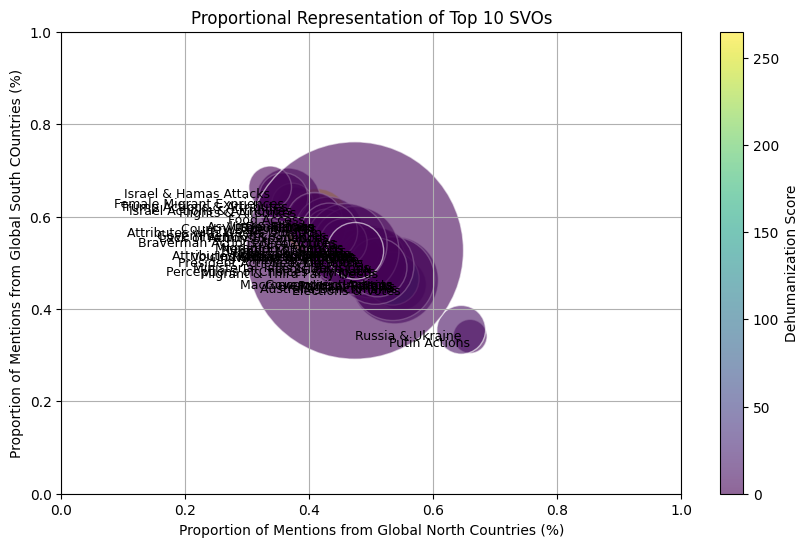

In [54]:
# Visualization of all clusters--dictionary
# GN - GS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(result_df['total_dictionaries'].min(), result_df['total_dictionaries'].max())
cmap = plt.get_cmap('viridis')  # Using plt.get_cmap instead of matplotlib.cm.get_cmap

# Scatter plot
scatter = plt.scatter(
    result_df['GN_prop'],
    result_df['GS_prop'],
    s=result_df['n_articles']*3,  # Size based on 'n_articles'
    c=result_df['total_dictionaries'],  # Color based on 'dehuman_score'
    cmap=cmap,  # Using the viridis colormap
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

# Adding labels and title
plt.xlabel('Proportion of Mentions from Global North Countries (%)')
plt.ylabel('Proportion of Mentions from Global South COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)


# Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in result_df.iterrows():
    text = plt.text(
        row['GN_prop'], 
        row['GS_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

plt.xlim(0, 1)
plt.ylim(0, 1)

# Show plot
plt.show()

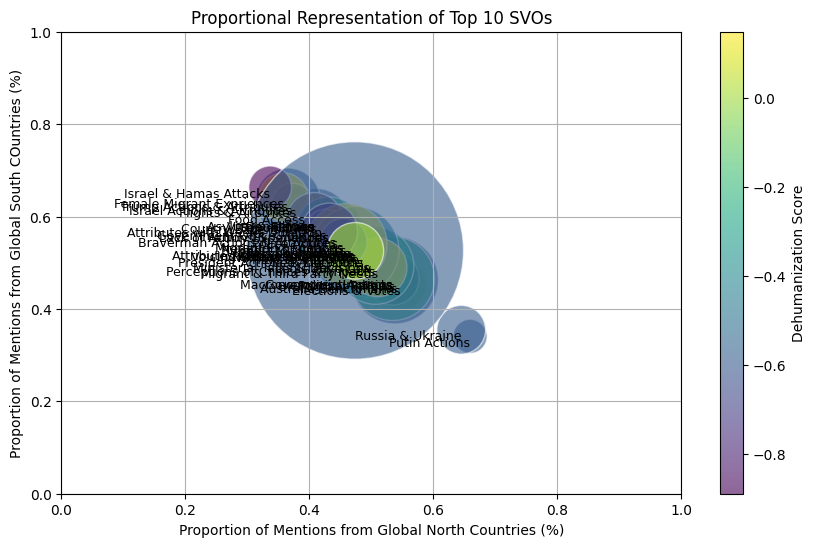

In [96]:
# Visualization of all clusters--llama
# GN - GS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(result_df['dehuman_score'].min(), result_df['dehuman_score'].max())
cmap = plt.get_cmap('viridis')  # Using plt.get_cmap instead of matplotlib.cm.get_cmap

# Scatter plot
scatter = plt.scatter(
    result_df['GN_prop'],
    result_df['GS_prop'],
    s=result_df['n_articles']*3,  # Size based on 'n_articles'
    c=result_df['dehuman_score'],  # Color based on 'dehuman_score'
    cmap=cmap,  # Using the viridis colormap
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

# Adding labels and title
plt.xlabel('Proportion of Mentions from Global North Countries (%)')
plt.ylabel('Proportion of Mentions from Global South COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)


# Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in result_df.iterrows():
    text = plt.text(
        row['GN_prop'], 
        row['GS_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

plt.xlim(0, 1)
plt.ylim(0, 1)

# Show plot
plt.show()


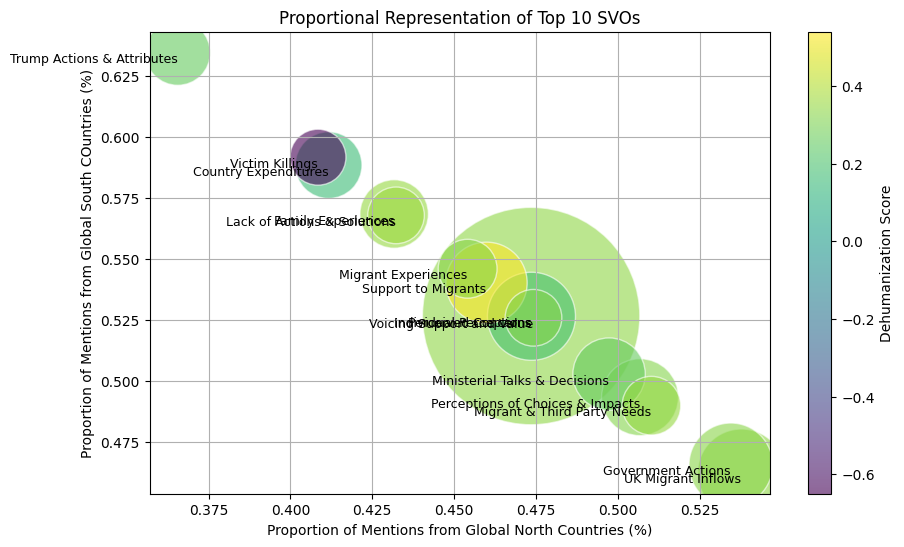

In [55]:
# GN - GS-Perspective
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(top_clusters['Perspective(ws)'].min(), top_clusters['Perspective(ws)'].max())
cmap = plt.get_cmap('viridis')  # Using plt.get_cmap instead of matplotlib.cm.get_cmap

# Scatter plot
scatter = plt.scatter(
    top_clusters['GN_prop'],
    top_clusters['GS_prop'],
    s=top_clusters['n_articles']*3,  # Size based on 'n_articles'
    c=top_clusters['Perspective(ws)'],  # Color based on 'dehuman_score'
    cmap=cmap,  # Using the viridis colormap
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

# Adding labels and title
plt.xlabel('Proportion of Mentions from Global North Countries (%)')
plt.ylabel('Proportion of Mentions from Global South COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)


# Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in top_clusters.iterrows():
    text = plt.text(
        row['GN_prop'], 
        row['GS_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)
    
# Show plot
plt.show()

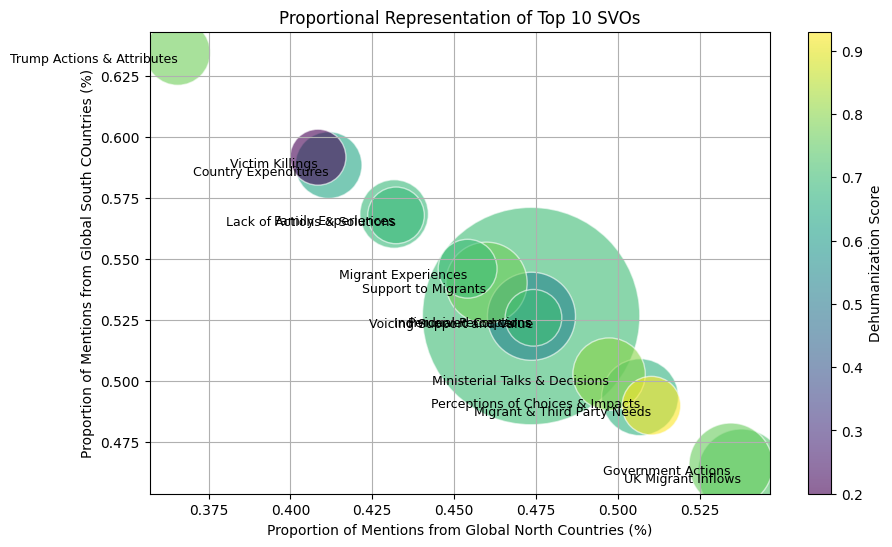

In [56]:
# GN - GS-Perspective
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(top_clusters['Value(s)'].min(), top_clusters['Value(s)'].max())
cmap = plt.get_cmap('viridis')  # Using plt.get_cmap instead of matplotlib.cm.get_cmap

# Scatter plot
scatter = plt.scatter(
    top_clusters['GN_prop'],
    top_clusters['GS_prop'],
    s=top_clusters['n_articles']*3,  # Size based on 'n_articles'
    c=top_clusters['Value(s)'],  # Color based on 'dehuman_score'
    cmap=cmap,  # Using the viridis colormap
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

# Adding labels and title
plt.xlabel('Proportion of Mentions from Global North Countries (%)')
plt.ylabel('Proportion of Mentions from Global South COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)


# Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in top_clusters.iterrows():
    text = plt.text(
        row['GN_prop'], 
        row['GS_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)
    
# Show plot
plt.show()

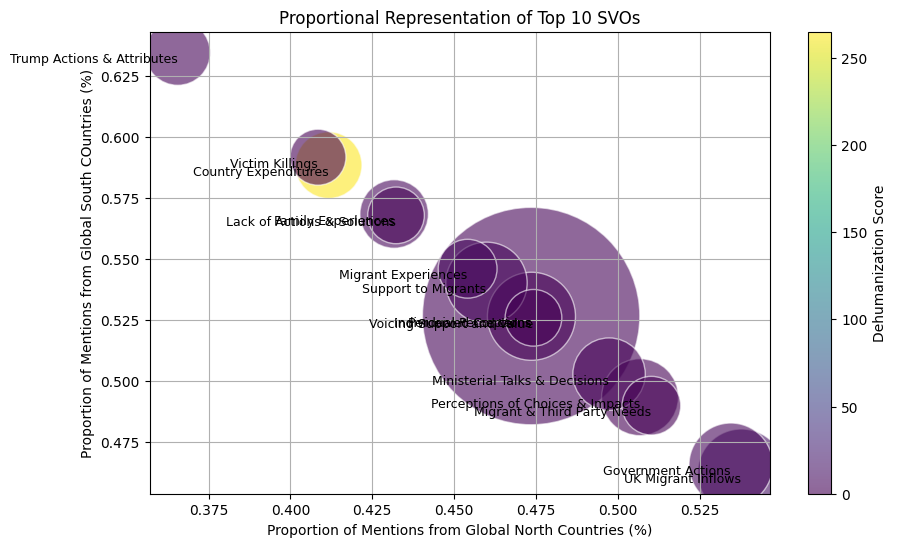

In [62]:
# GN - GS-- dictionary
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(top_clusters['total_dictionaries'].min(), top_clusters['total_dictionaries'].max())
cmap = plt.get_cmap('viridis')  # Using plt.get_cmap instead of matplotlib.cm.get_cmap

# Scatter plot
scatter = plt.scatter(
    top_clusters['GN_prop'],
    top_clusters['GS_prop'],
    s=top_clusters['n_articles']*3,  # Size based on 'n_articles'
    c=top_clusters['total_dictionaries'],  # Color based on 'dehuman_score'
    cmap=cmap,  # Using the viridis colormap
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

# Adding labels and title
plt.xlabel('Proportion of Mentions from Global North Countries (%)')
plt.ylabel('Proportion of Mentions from Global South COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)


# Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in top_clusters.iterrows():
    text = plt.text(
        row['GN_prop'], 
        row['GS_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)
    
# Show plot
plt.show()


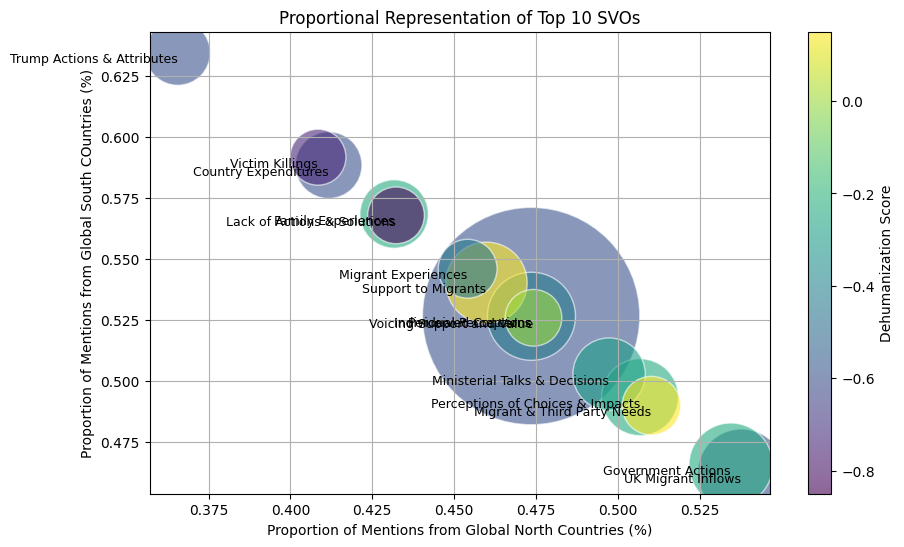

In [97]:
# GN - GS-llama
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(top_clusters['dehuman_score'].min(), top_clusters['dehuman_score'].max())
cmap = plt.get_cmap('viridis')  # Using plt.get_cmap instead of matplotlib.cm.get_cmap

# Scatter plot
scatter = plt.scatter(
    top_clusters['GN_prop'],
    top_clusters['GS_prop'],
    s=top_clusters['n_articles']*3,  # Size based on 'n_articles'
    c=top_clusters['dehuman_score'],  # Color based on 'dehuman_score'
    cmap=cmap,  # Using the viridis colormap
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

# Adding labels and title
plt.xlabel('Proportion of Mentions from Global North Countries (%)')
plt.ylabel('Proportion of Mentions from Global South COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)


# Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in top_clusters.iterrows():
    text = plt.text(
        row['GN_prop'], 
        row['GS_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)
    
# Show plot
plt.show()


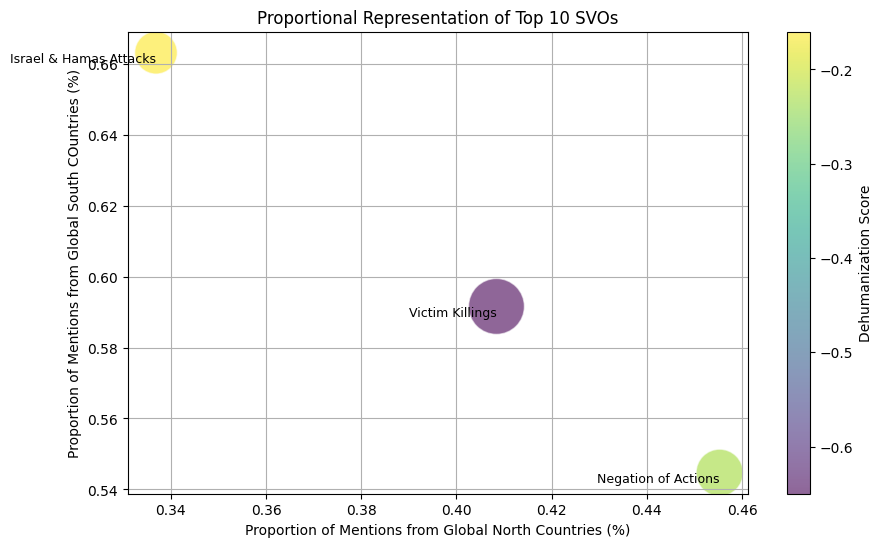

In [64]:
# clusters with dehuman_score > 0.45
import matplotlib.pyplot as plt
import pandas as pd

# Ensure dehuman_score is numeric and handle NaNs
result_df['Perspective(ws)'] = pd.to_numeric(result_df['Perspective(ws)'], errors='coerce')
result_df.dropna(subset=['Perspective(ws)'], inplace=True)

# Filter to only include rows with dehuman_score greater than 0.5
filtered_df = result_df[result_df['Perspective(ws)'] < -0.1]

# Check the min and max values in the filtered dataframe
dehuman_score_min = filtered_df['Perspective(ws)'].min()
dehuman_score_max = filtered_df['Perspective(ws)'].max()

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')


scatter = plt.scatter(
    filtered_df['GN_prop'],
    filtered_df['GS_prop'],
    s=filtered_df['n_articles']*3,  # Adjust size for visibility
    c=filtered_df['Perspective(ws)'],  
    cmap=cmap, 
    norm=norm,  # Apply normalization
    alpha=0.6,
    edgecolors='w',
    linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in filtered_df.iterrows():
    text = plt.text(
        row['GN_prop'], 
        row['GS_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# Adding labels and title
plt.xlabel('Proportion of Mentions from Global North Countries (%)')
plt.ylabel('Proportion of Mentions from Global South COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)

plt.show()

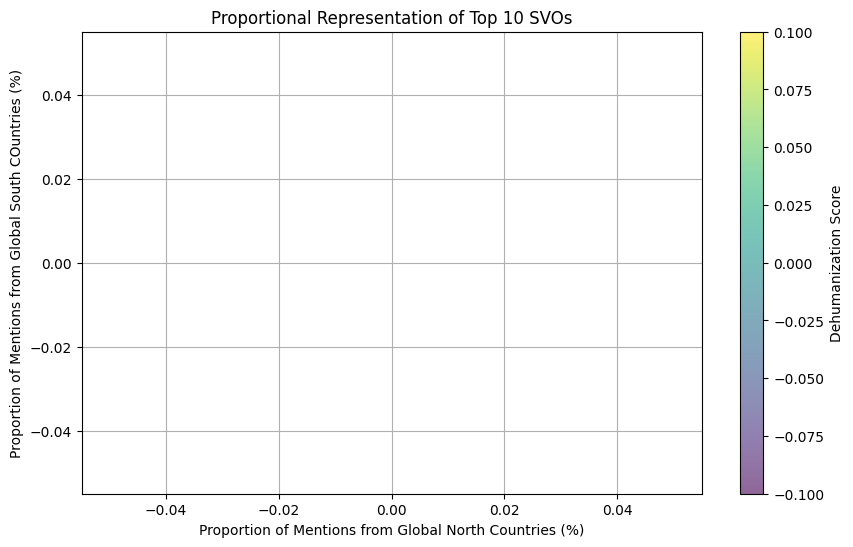

In [65]:
# clusters with dehuman_score > 0.45
import matplotlib.pyplot as plt
import pandas as pd

# Ensure dehuman_score is numeric and handle NaNs
result_df['Value(s)'] = pd.to_numeric(result_df['Value(s)'], errors='coerce')
result_df.dropna(subset=['Value(s)'], inplace=True)

# Filter to only include rows with dehuman_score greater than 0.5
filtered_df = result_df[result_df['Value(s)'] < -0.1]

# Check the min and max values in the filtered dataframe
dehuman_score_min = filtered_df['Value(s)'].min()
dehuman_score_max = filtered_df['Value(s)'].max()

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')


scatter = plt.scatter(
    filtered_df['GN_prop'],
    filtered_df['GS_prop'],
    s=filtered_df['n_articles']*3,  # Adjust size for visibility
    c=filtered_df['Value(s)'],  
    cmap=cmap, 
    norm=norm,  # Apply normalization
    alpha=0.6,
    edgecolors='w',
    linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in filtered_df.iterrows():
    text = plt.text(
        row['GN_prop'], 
        row['GS_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# Adding labels and title
plt.xlabel('Proportion of Mentions from Global North Countries (%)')
plt.ylabel('Proportion of Mentions from Global South COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)

plt.show()

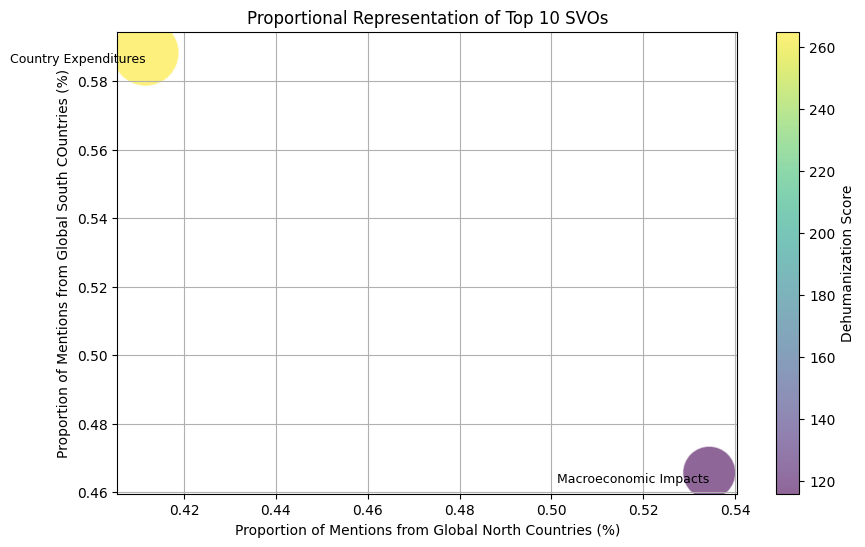

In [67]:
# clusters with dehuman_score > 0.45
import matplotlib.pyplot as plt
import pandas as pd

# Ensure dehuman_score is numeric and handle NaNs
result_df['total_dictionaries'] = pd.to_numeric(result_df['total_dictionaries'], errors='coerce')
result_df.dropna(subset=['total_dictionaries'], inplace=True)

# Filter to only include rows with dehuman_score greater than 0.5
filtered_df = result_df[result_df['total_dictionaries'] >20]

# Check the min and max values in the filtered dataframe
dehuman_score_min = filtered_df['total_dictionaries'].min()
dehuman_score_max = filtered_df['total_dictionaries'].max()

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')


scatter = plt.scatter(
    filtered_df['GN_prop'],
    filtered_df['GS_prop'],
    s=filtered_df['n_articles']*3,  # Adjust size for visibility
    c=filtered_df['total_dictionaries'],  
    cmap=cmap, 
    norm=norm,  # Apply normalization
    alpha=0.6,
    edgecolors='w',
    linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in filtered_df.iterrows():
    text = plt.text(
        row['GN_prop'], 
        row['GS_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# Adding labels and title
plt.xlabel('Proportion of Mentions from Global North Countries (%)')
plt.ylabel('Proportion of Mentions from Global South COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)

plt.show()

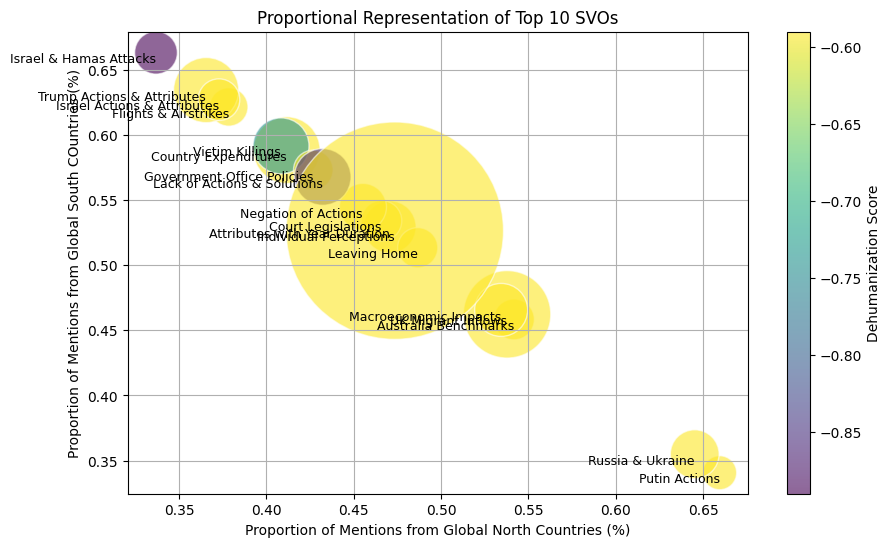

In [98]:
# clusters with dehuman_score > 0.45-- llama
import matplotlib.pyplot as plt
import pandas as pd

# Ensure dehuman_score is numeric and handle NaNs
result_df['dehuman_score'] = pd.to_numeric(result_df['dehuman_score'], errors='coerce')
result_df.dropna(subset=['dehuman_score'], inplace=True)

# Filter to only include rows with dehuman_score greater than 0.5
filtered_df = result_df[result_df['dehuman_score'] < -0.5]

# Check the min and max values in the filtered dataframe
dehuman_score_min = filtered_df['dehuman_score'].min()
dehuman_score_max = filtered_df['dehuman_score'].max()

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')


scatter = plt.scatter(
    filtered_df['GN_prop'],
    filtered_df['GS_prop'],
    s=filtered_df['n_articles']*3,  # Adjust size for visibility
    c=filtered_df['dehuman_score'],  
    cmap=cmap, 
    norm=norm,  # Apply normalization
    alpha=0.6,
    edgecolors='w',
    linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in filtered_df.iterrows():
    text = plt.text(
        row['GN_prop'], 
        row['GS_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# Adding labels and title
plt.xlabel('Proportion of Mentions from Global North Countries (%)')
plt.ylabel('Proportion of Mentions from Global South COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)

plt.show()

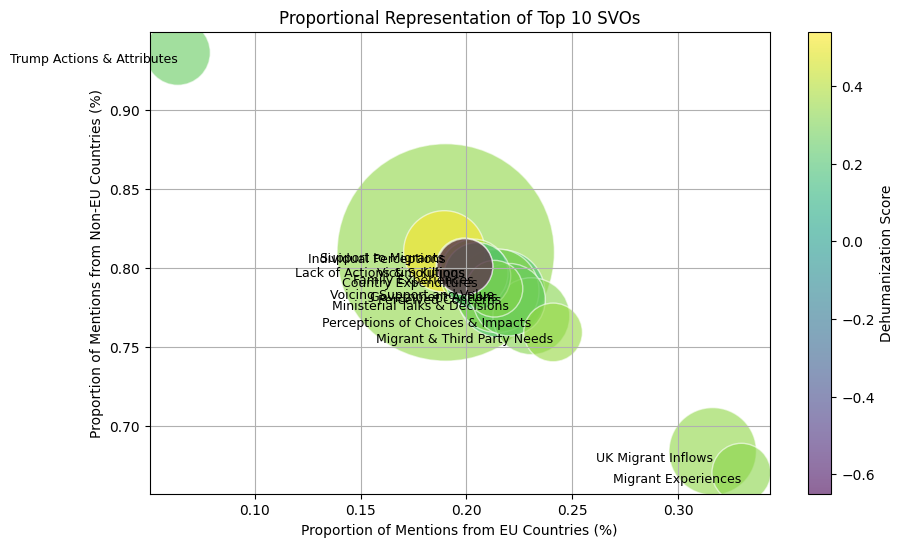

In [68]:
# EU - nonEU-- Perspective
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(top_clusters['Perspective(ws)'].min(), top_clusters['Perspective(ws)'].max())
cmap = plt.get_cmap('viridis')  # Using plt.get_cmap instead of matplotlib.cm.get_cmap

# Scatter plot
scatter = plt.scatter(
    top_clusters['EU_prop'],
    top_clusters['nonEU_prop'],
    s=top_clusters['n_articles']*3,  # Size based on 'n_articles'
    c=top_clusters['Perspective(ws)'],  # Color based on 'dehuman_score'
    cmap=cmap,  # Using the viridis colormap
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

# Adding labels and title
plt.xlabel('Proportion of Mentions from EU Countries (%)')
plt.ylabel('Proportion of Mentions from Non-EU Countries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)


# Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in top_clusters.iterrows():
    text = plt.text(
        row['EU_prop'], 
        row['nonEU_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# Show plot
plt.show()


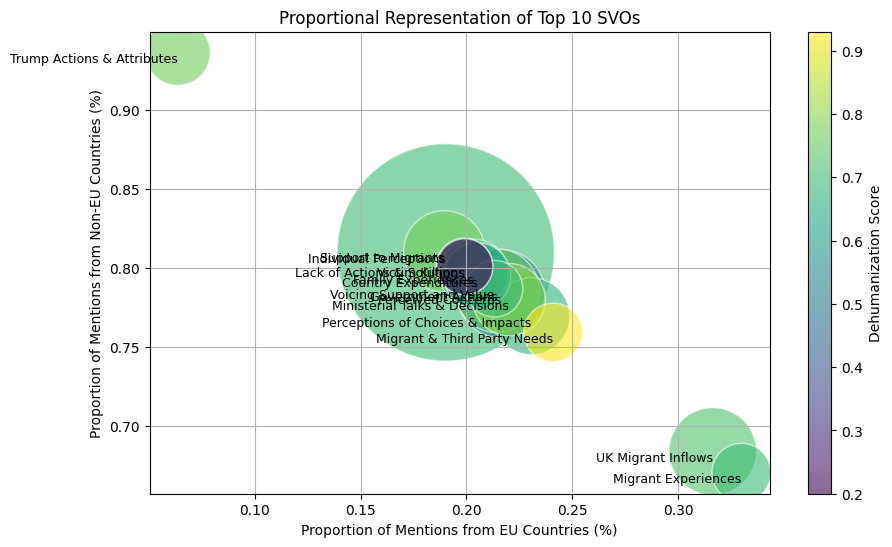

In [69]:
# EU - nonEU-- Value
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(top_clusters['Value(s)'].min(), top_clusters['Value(s)'].max())
cmap = plt.get_cmap('viridis')  # Using plt.get_cmap instead of matplotlib.cm.get_cmap

# Scatter plot
scatter = plt.scatter(
    top_clusters['EU_prop'],
    top_clusters['nonEU_prop'],
    s=top_clusters['n_articles']*3,  # Size based on 'n_articles'
    c=top_clusters['Value(s)'],  # Color based on 'dehuman_score'
    cmap=cmap,  # Using the viridis colormap
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

# Adding labels and title
plt.xlabel('Proportion of Mentions from EU Countries (%)')
plt.ylabel('Proportion of Mentions from Non-EU Countries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)


# Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in top_clusters.iterrows():
    text = plt.text(
        row['EU_prop'], 
        row['nonEU_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# Show plot
plt.show()


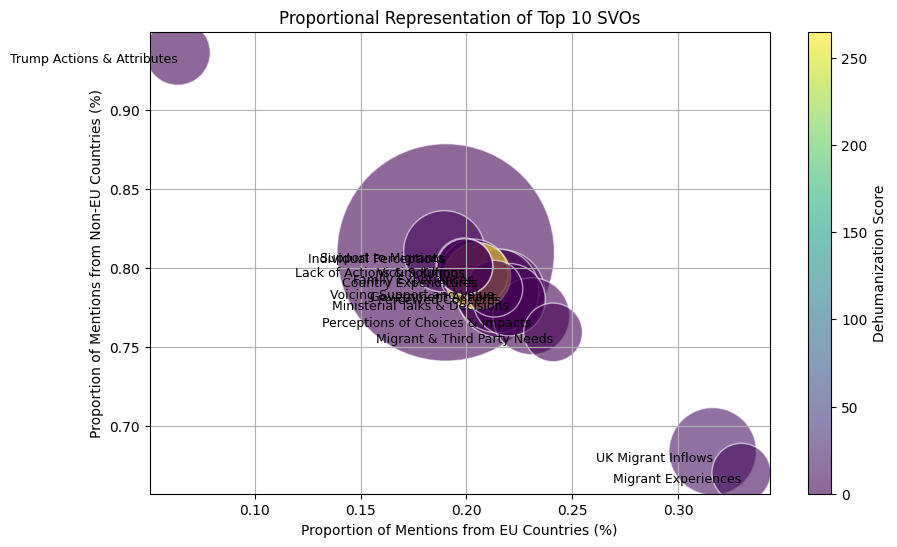

In [71]:
# EU - nonEU- dictionary
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(top_clusters['total_dictionaries'].min(), top_clusters['total_dictionaries'].max())
cmap = plt.get_cmap('viridis')  # Using plt.get_cmap instead of matplotlib.cm.get_cmap

# Scatter plot
scatter = plt.scatter(
    top_clusters['EU_prop'],
    top_clusters['nonEU_prop'],
    s=top_clusters['n_articles']*3,  # Size based on 'n_articles'
    c=top_clusters['total_dictionaries'],  # Color based on 'dehuman_score'
    cmap=cmap,  # Using the viridis colormap
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

# Adding labels and title
plt.xlabel('Proportion of Mentions from EU Countries (%)')
plt.ylabel('Proportion of Mentions from Non-EU Countries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)


# Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in top_clusters.iterrows():
    text = plt.text(
        row['EU_prop'], 
        row['nonEU_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# Show plot
plt.show()


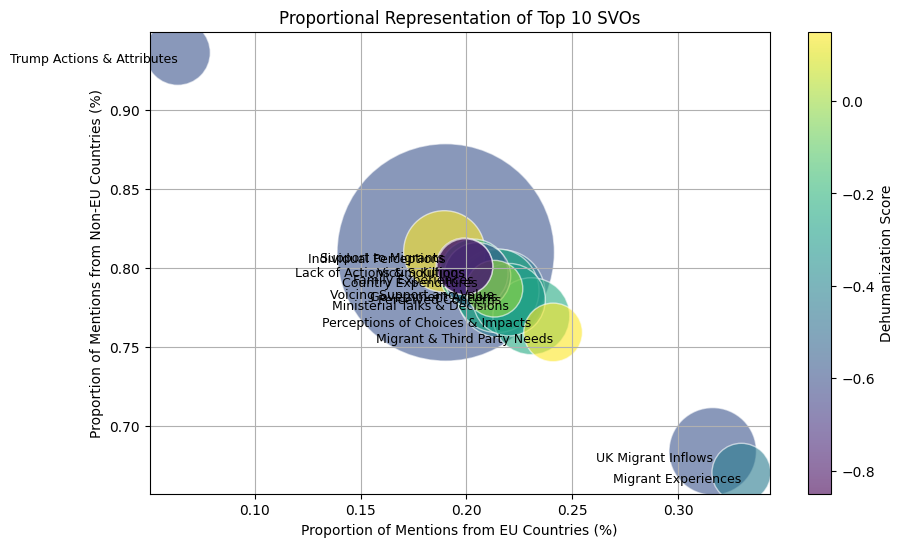

In [47]:
# EU - nonEU-llama
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(top_clusters['dehuman_score'].min(), top_clusters['dehuman_score'].max())
cmap = plt.get_cmap('viridis')  # Using plt.get_cmap instead of matplotlib.cm.get_cmap

# Scatter plot
scatter = plt.scatter(
    top_clusters['EU_prop'],
    top_clusters['nonEU_prop'],
    s=top_clusters['n_articles']*3,  # Size based on 'n_articles'
    c=top_clusters['dehuman_score'],  # Color based on 'dehuman_score'
    cmap=cmap,  # Using the viridis colormap
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

# Adding labels and title
plt.xlabel('Proportion of Mentions from EU Countries (%)')
plt.ylabel('Proportion of Mentions from Non-EU Countries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)


# Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in top_clusters.iterrows():
    text = plt.text(
        row['EU_prop'], 
        row['nonEU_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# Show plot
plt.show()


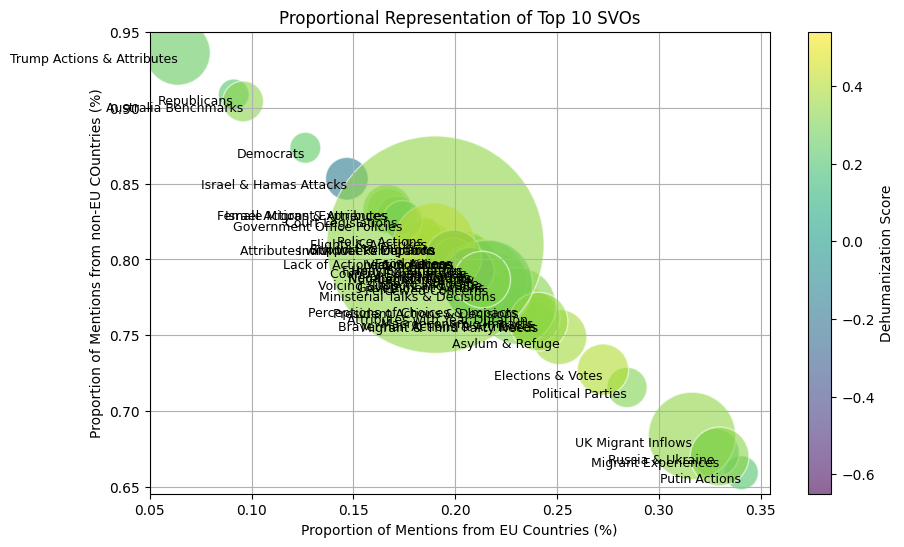

In [73]:
# Visualization of all clusters
# EU - non-EU
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Ensure dehuman_score is numeric and handle NaNs
result_df['Perspective(ws)'] = pd.to_numeric(result_df['Perspective(ws)'], errors='coerce')
result_df.dropna(subset=['Perspective(ws)_x'], inplace=True)

# Check the min and max values in the filtered dataframe
dehuman_score_min = result_df['Perspective(ws)'].min()
dehuman_score_max = result_df['Perspective(ws)'].max()

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')


scatter = plt.scatter(
    result_df['EU_prop'],
    result_df['nonEU_prop'],
    s=result_df['n_articles']*3,
    c=result_df['Perspective(ws)'],  
    cmap=cmap, 
    norm=norm,
    alpha=0.6,
    edgecolors='w',
    linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in result_df.iterrows():
    text = plt.text(
        row['EU_prop'], 
        row['nonEU_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# plt.xlim(0, 1)
# plt.ylim(0, 1)

    # Adding labels and title
plt.xlabel('Proportion of Mentions from EU Countries (%)')
plt.ylabel('Proportion of Mentions from non-EU COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)

plt.show()

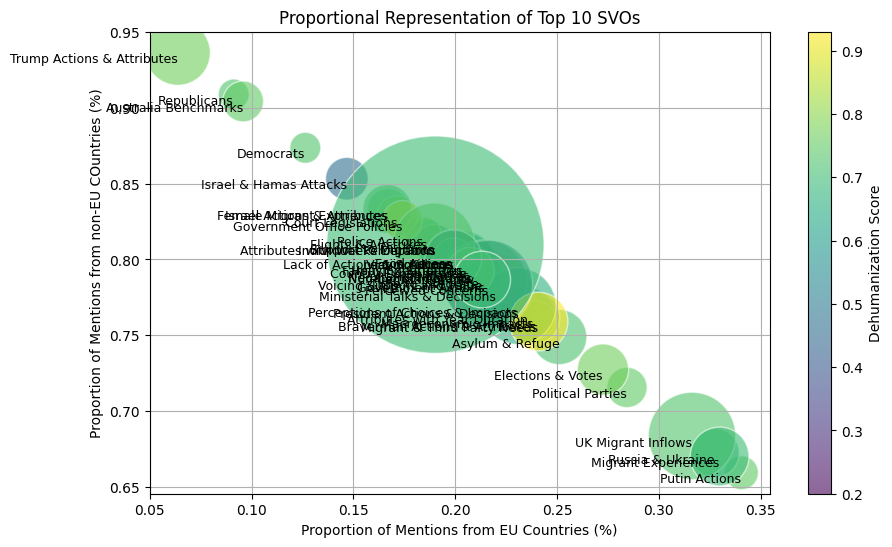

In [74]:
# Visualization of all clusters
# EU - non-EU
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Ensure dehuman_score is numeric and handle NaNs
result_df['Value(s)'] = pd.to_numeric(result_df['Value(s)'], errors='coerce')
result_df.dropna(subset=['Value(s)'], inplace=True)

# Check the min and max values in the filtered dataframe
dehuman_score_min = result_df['Value(s)'].min()
dehuman_score_max = result_df['Value(s)'].max()

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')


scatter = plt.scatter(
    result_df['EU_prop'],
    result_df['nonEU_prop'],
    s=result_df['n_articles']*3,
    c=result_df['Value(s)'],  
    cmap=cmap, 
    norm=norm,
    alpha=0.6,
    edgecolors='w',
    linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in result_df.iterrows():
    text = plt.text(
        row['EU_prop'], 
        row['nonEU_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# plt.xlim(0, 1)
# plt.ylim(0, 1)

    # Adding labels and title
plt.xlabel('Proportion of Mentions from EU Countries (%)')
plt.ylabel('Proportion of Mentions from non-EU COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)

plt.show()

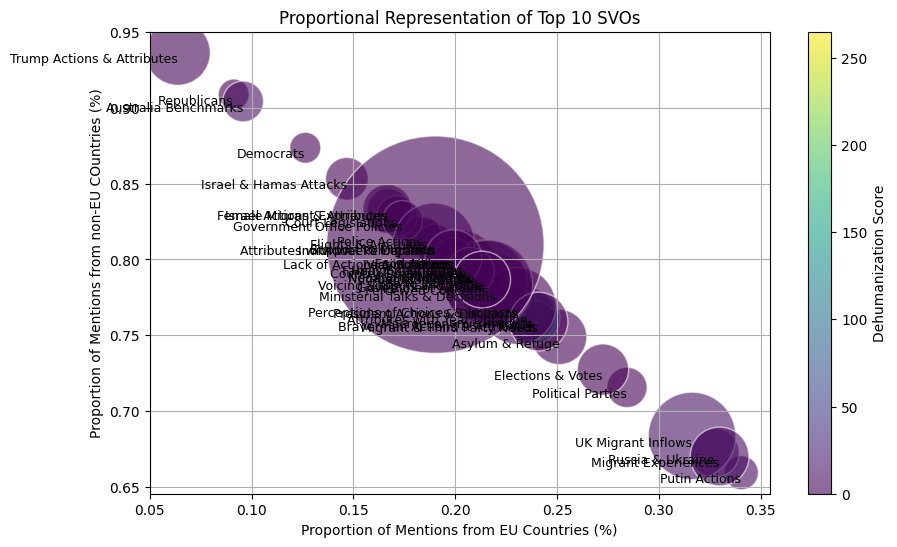

In [75]:
# Visualization of all clusters-- dictionary
# EU - non-EU
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Ensure dehuman_score is numeric and handle NaNs
result_df['total_dictionaries'] = pd.to_numeric(result_df['total_dictionaries'], errors='coerce')
result_df.dropna(subset=['total_dictionaries'], inplace=True)

# Check the min and max values in the filtered dataframe
dehuman_score_min = result_df['total_dictionaries'].min()
dehuman_score_max = result_df['total_dictionaries'].max()

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')


scatter = plt.scatter(
    result_df['EU_prop'],
    result_df['nonEU_prop'],
    s=result_df['n_articles']*3,
    c=result_df['total_dictionaries'],  
    cmap=cmap, 
    norm=norm,
    alpha=0.6,
    edgecolors='w',
    linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in result_df.iterrows():
    text = plt.text(
        row['EU_prop'], 
        row['nonEU_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# plt.xlim(0, 1)
# plt.ylim(0, 1)

    # Adding labels and title
plt.xlabel('Proportion of Mentions from EU Countries (%)')
plt.ylabel('Proportion of Mentions from non-EU COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)

plt.show()

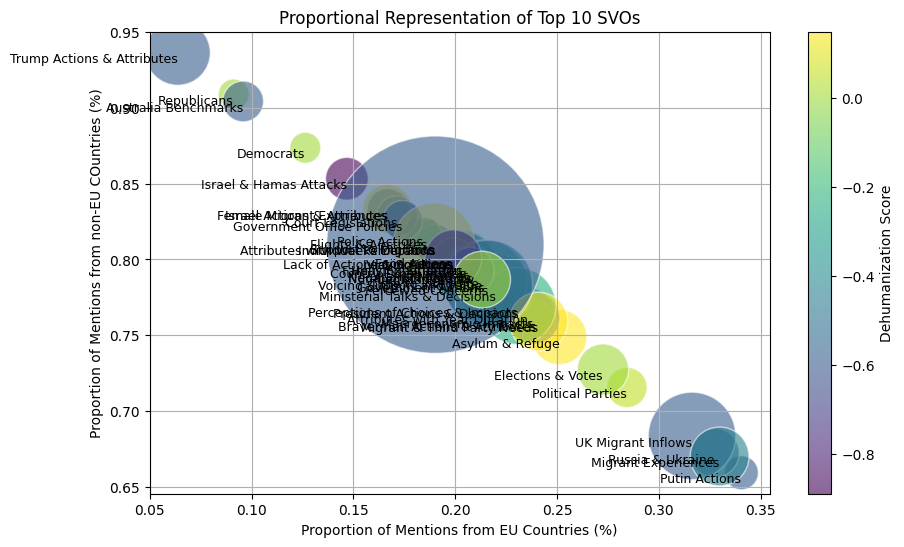

In [48]:
# Visualization of all clusters
# EU - non-EU
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Ensure dehuman_score is numeric and handle NaNs
result_df['dehuman_score'] = pd.to_numeric(result_df['dehuman_score'], errors='coerce')
result_df.dropna(subset=['dehuman_score'], inplace=True)

# Check the min and max values in the filtered dataframe
dehuman_score_min = result_df['dehuman_score'].min()
dehuman_score_max = result_df['dehuman_score'].max()

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')


scatter = plt.scatter(
    result_df['EU_prop'],
    result_df['nonEU_prop'],
    s=result_df['n_articles']*3,
    c=result_df['dehuman_score'],  
    cmap=cmap, 
    norm=norm,
    alpha=0.6,
    edgecolors='w',
    linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in result_df.iterrows():
    text = plt.text(
        row['EU_prop'], 
        row['nonEU_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)

# plt.xlim(0, 1)
# plt.ylim(0, 1)

    # Adding labels and title
plt.xlabel('Proportion of Mentions from EU Countries (%)')
plt.ylabel('Proportion of Mentions from non-EU COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)

plt.show()

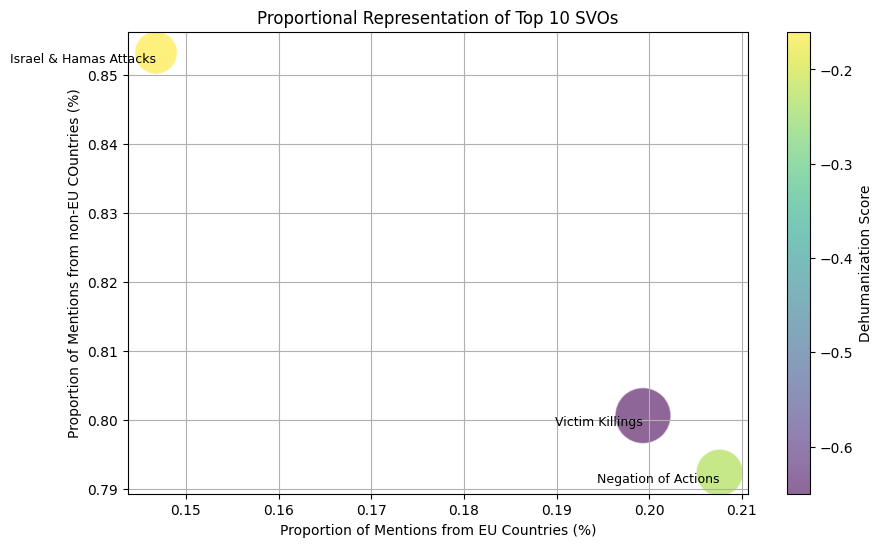

In [76]:
# EU - non-EU-- Perspective
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Ensure dehuman_score is numeric and handle NaNs
result_df['Perspective(ws)'] = pd.to_numeric(result_df['Perspective(ws)'], errors='coerce')
result_df.dropna(subset=['Perspective(ws)'], inplace=True)

# Filter to only include rows with dehuman_score greater than 0.5
filtered_df = result_df[result_df['Perspective(ws)'] < -0.1]

# Check the min and max values in the filtered dataframe
dehuman_score_min = filtered_df['Perspective(ws)'].min()
dehuman_score_max = filtered_df['Perspective(ws)'].max()

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')


scatter = plt.scatter(
    filtered_df['EU_prop'],
    filtered_df['nonEU_prop'],
    s=filtered_df['n_articles']*3,  # Adjust size for visibility
    c=filtered_df['Perspective(ws)'],  
    cmap=cmap, 
    norm=norm,  # Apply normalization
    alpha=0.6,
    edgecolors='w',
    linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in filtered_df.iterrows():
    text = plt.text(
        row['EU_prop'], 
        row['nonEU_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)
    
    # Adding labels and title
plt.xlabel('Proportion of Mentions from EU Countries (%)')
plt.ylabel('Proportion of Mentions from non-EU COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)

plt.show()

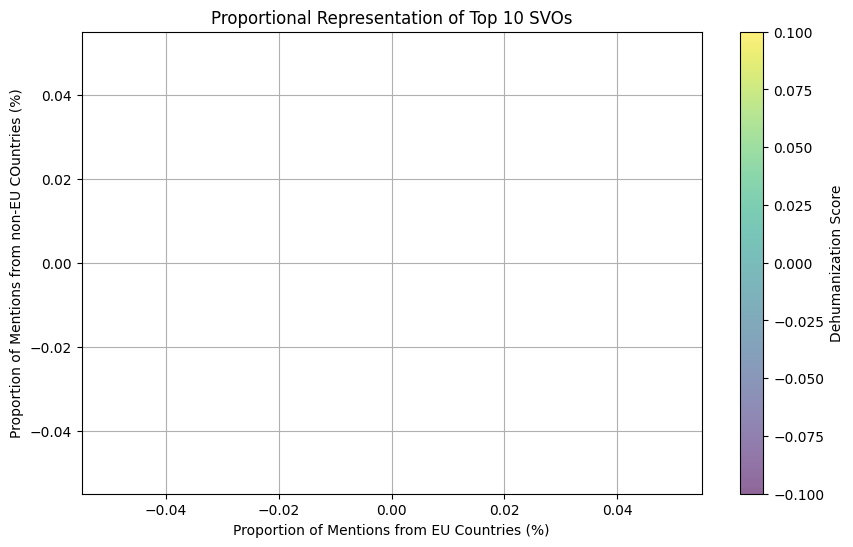

In [77]:
# EU - non-EU-- Value
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Ensure dehuman_score is numeric and handle NaNs
result_df['Value(s)'] = pd.to_numeric(result_df['Value(s)'], errors='coerce')
result_df.dropna(subset=['Value(s)'], inplace=True)

# Filter to only include rows with dehuman_score greater than 0.5
filtered_df = result_df[result_df['Value(s)'] < -0.1]

# Check the min and max values in the filtered dataframe
dehuman_score_min = filtered_df['Value(s)'].min()
dehuman_score_max = filtered_df['Value(s)'].max()

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')


scatter = plt.scatter(
    filtered_df['EU_prop'],
    filtered_df['nonEU_prop'],
    s=filtered_df['n_articles']*3,  # Adjust size for visibility
    c=filtered_df['Value(s)'],  
    cmap=cmap, 
    norm=norm,  # Apply normalization
    alpha=0.6,
    edgecolors='w',
    linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in filtered_df.iterrows():
    text = plt.text(
        row['EU_prop'], 
        row['nonEU_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)
    
    # Adding labels and title
plt.xlabel('Proportion of Mentions from EU Countries (%)')
plt.ylabel('Proportion of Mentions from non-EU COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)

plt.show()

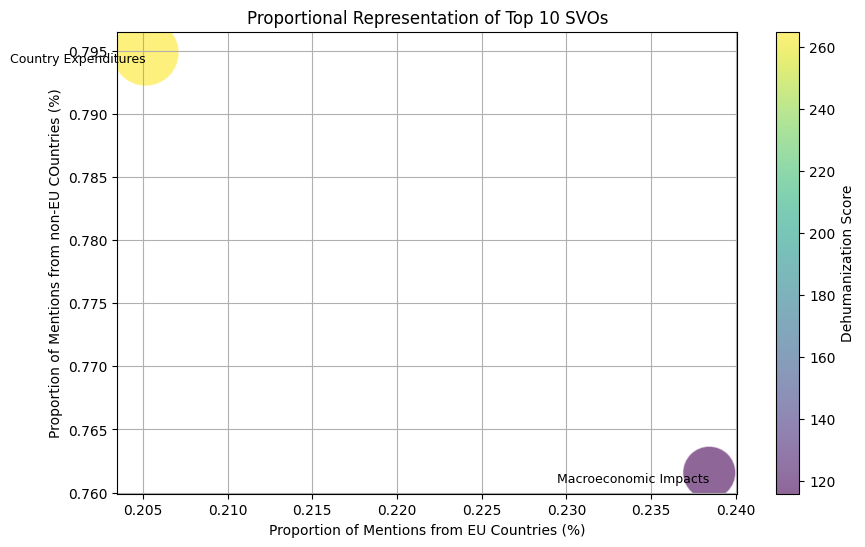

In [78]:
# EU - non-EU-- dictionary
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Ensure dehuman_score is numeric and handle NaNs
result_df['total_dictionaries'] = pd.to_numeric(result_df['total_dictionaries'], errors='coerce')
result_df.dropna(subset=['total_dictionaries'], inplace=True)

# Filter to only include rows with dehuman_score greater than 0.5
filtered_df = result_df[result_df['total_dictionaries'] >20]

# Check the min and max values in the filtered dataframe
dehuman_score_min = filtered_df['total_dictionaries'].min()
dehuman_score_max = filtered_df['total_dictionaries'].max()

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')


scatter = plt.scatter(
    filtered_df['EU_prop'],
    filtered_df['nonEU_prop'],
    s=filtered_df['n_articles']*3,  # Adjust size for visibility
    c=filtered_df['total_dictionaries'],  
    cmap=cmap, 
    norm=norm,  # Apply normalization
    alpha=0.6,
    edgecolors='w',
    linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in filtered_df.iterrows():
    text = plt.text(
        row['EU_prop'], 
        row['nonEU_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)
    
    # Adding labels and title
plt.xlabel('Proportion of Mentions from EU Countries (%)')
plt.ylabel('Proportion of Mentions from non-EU COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)

plt.show()

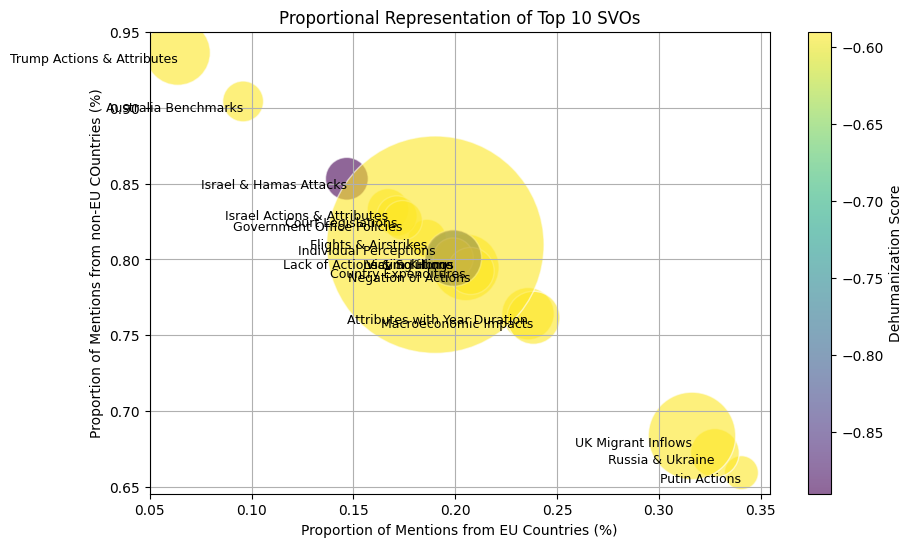

In [49]:
# EU - non-EU--llama
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Ensure dehuman_score is numeric and handle NaNs
result_df['dehuman_score'] = pd.to_numeric(result_df['dehuman_score'], errors='coerce')
result_df.dropna(subset=['dehuman_score'], inplace=True)

# Filter to only include rows with dehuman_score greater than 0.5
filtered_df = result_df[result_df['dehuman_score'] < -0.5]

# Check the min and max values in the filtered dataframe
dehuman_score_min = filtered_df['dehuman_score'].min()
dehuman_score_max = filtered_df['dehuman_score'].max()

# Create the plot
plt.figure(figsize=(10, 6))

# Color mapping
norm = plt.Normalize(dehuman_score_min, dehuman_score_max)
cmap = plt.get_cmap('viridis')


scatter = plt.scatter(
    filtered_df['EU_prop'],
    filtered_df['nonEU_prop'],
    s=filtered_df['n_articles']*3,  # Adjust size for visibility
    c=filtered_df['dehuman_score'],  
    cmap=cmap, 
    norm=norm,  # Apply normalization
    alpha=0.6,
    edgecolors='w',
    linewidth=1
    )

    # Adding colorbar
plt.colorbar(scatter, label='Dehumanization Score')

texts = []
for i, row in filtered_df.iterrows():
    text = plt.text(
        row['EU_prop'], 
        row['nonEU_prop'], 
        row['title'], 
        ha='right', 
        va='top',
        fontsize=9
    )
    texts.append(text)
    
    # Adding labels and title
plt.xlabel('Proportion of Mentions from EU Countries (%)')
plt.ylabel('Proportion of Mentions from non-EU COuntries (%)')
plt.title('Proportional Representation of Top 10 SVOs')
plt.grid(True)

plt.show()

### Formalizing into a table format

In [37]:
result_df.columns

Index(['hdb_string_clusters', 'Top_SVOs', 'both', 'guardian', 'telegraph',
       'EU_Mentions', 'NonEU_Mentions', 'GN_Mentions', 'GS_Mentions',
       'Total_Count', 'n_articles', 'num_svos', 'macro', 'title',
       'Effective_Telegraph', 'Effective_Telegraph_prop', 'Effective_Guardian',
       'Effective_Guardian_prop', 'GN_prop', 'GS_prop', 'color', 'EU_prop',
       'nonEU_prop', 'Perspective(ws)', 'Perspective(wo)', 'Value(o)',
       'Value(s)', 'total_dictionaries', 'dehuman_score'],
      dtype='object')

In [43]:
result_df.to_csv('data_political_lines.csv')

In [39]:
summary_df = result_df[['hdb_string_clusters', 'Top_SVOs', 'title', 'macro', 'Perspective(ws)', 'Value(s)', 'Value(o)', 'total_dictionaries', 'dehuman_score', 'Effective_Telegraph_prop', 
                        'Effective_Guardian_prop', 'GN_prop', 'GS_prop', 'EU_prop', 'nonEU_prop', 
                        'Total_Count', 'n_articles', 'num_svos']]
summary_df = summary_df.round(2)

In [47]:
summary_df.rename(columns={
    'hdb_string_clusters': 'Cluster #',
    'Top_SVOs': 'Top SVOs',
    'title': 'Title',
    'macro': 'Topic',
    'Perspective(ws)': 'Perspective Writer to Subject',
    'Value(s)': 'Value to Subject',
    'Value(o)': 'Value to Objects',
    'dehuman_score': 'llama Predictions',
    'total_dictionaries': 'Dehumanizing Keywords Total',
    'Effective_Telegraph_prop': 'Telegraph Proportion',
    'Effective_Guardian_prop': 'Guardian Proportion',
    'GN_prop': 'Global North Proportion',
    'GS_prop': 'Global South Proportion',
    'EU_prop': 'EU Proportion',
    'nonEU_prop': 'Non-EU Proportion',
    'Total_Count': 'Total Count',
    'n_articles': 'Number of Articles',
    'num_svos': 'Number of SVOs'
}, inplace=True)

In [48]:
summary_df.to_csv('summary_results.csv')

In [49]:
summary_df

Cluster #                                           Top SVOs  \
0           0  you have food\nauthority provide food\nbiden a...   
1           1  who support democrats\ndemocrats accuse govern...   
2           2  you get flight\naircraft assist crew\nwe get f...   
3           3  who use republicans\nbiden accuse republicans\...   
4           4  who visit australia\nalex tell australia\nspok...   
5           5  warsaw accuse putin\nagency quote putin\nbiden...   
6           6  government pay million\ngovernment spend billi...   
7           7  government spend year\nuk have year\nuk face y...   
8           8  you spend month\nbusiness have month\ncase tak...   
9           9  president unveil proposal\npresident urge bide...   
10         10  police lead investigation\npolice investigate ...   
11         11  trump call what\ntrump face charge\ntrump orde...   
12         12  you compare israel\nadministration tell israel...   
13         13  secretary tell house\nwhich pass house\ni info...   
14         14  people seek asylum\npeople claim asylum\npopul...   
15         15  party hold lead\nparty have chance\nparty have...   
16         16  who support russia\nactivist flee russia\nruss...   
17         17  court make ruling\nkc tell court\njudge hear a...   
18         18  government have majority\nparty win seat\npart...   
19         19  i m girl\nthose include woman\ntiwari tell i\n...   
20         20  which kill palestinians\naction kill palestini...   
21         21  braverman tell conference\nbraverman take resp...   
22         22  you want change\nauthority reach uk\nbill put ...   
23         23  migrant cross channel\nmigrant show migrant\nt...   
24         24  bill become law\ngovernment pass law\ngovernme...   
25         25  you tell family\napplication have family\nauth...   
26         26  he become minister\ni ask minister\nminister t...   
27         27  people kill people\nwho kill father\nstrike ki...   
28         28  you see time\nassessment take time\nbe give ti...   
29         29  government increase number\nwe get growth\nwe ...   
30         30  you see number\narea have number\ncountry have...   
31         31  people do job\npeople find job\nwho have work\...   
32         32  we contact office\noffice issue notice\ni cont...   
33         33  government introduce system\ngovernment introd...   
34         34  you leave what\ni leave alone\nwe scrap plan\n...   
35         35  people have choice\nthose have choice\nthose h...   
36         36  people raise concern\npeople have problem\nwe ...   
37         37  you need thing\nconcern require consideration\...   
38         38  you thank you\nbiden have respect\ni accept th...   
39         39  we not support bill\nyou not receive briefing\...   
40         40  government do nothing\npeople do nothing\nwe n...   
41         41  people have right\nthat s i\nwe have those\nwe...   
42         42  you see lot\nwhich generate lot\nwhich get lot...   

                               Title                 Topic  \
0                        Food Access           integration   
1                          Democrats        systems/policy   
2               Flights & Airstrikes             crime/law   
3                        Republicans        systems/policy   
4               Australia Benchmarks  international issues   
5                      Putin Actions  international issues   
6               Country Expenditures             economics   
7      Attributes with Year Duration             economics   
8     Attributes with Weeks Duration           integration   
9      President Actions & Decisions        systems/policy   
10                    Police Actions             crime/law   
11        Trump Actions & Attributes        systems/policy   
12       Israel Actions & Attributes  international issues   
13                 Housing Situation           integration   
14                   Asylum & Refuge           integration   
15                 

### Attempts with Interactive Graphs

In [50]:
result_df.columns

Index(['hdb_string_clusters', 'Top_SVOs', 'both', 'guardian', 'telegraph',
       'EU_Mentions', 'NonEU_Mentions', 'GN_Mentions', 'GS_Mentions',
       'Total_Count', 'n_articles', 'num_svos', 'macro', 'title',
       'Effective_Telegraph', 'Effective_Telegraph_prop', 'Effective_Guardian',
       'Effective_Guardian_prop', 'GN_prop', 'GS_prop', 'color', 'EU_prop',
       'nonEU_prop', 'Perspective(ws)', 'Perspective(wo)', 'Value(o)',
       'Value(s)', 'total_dictionaries', 'dehuman_score'],
      dtype='object')

In [41]:
import nbformat
print(nbformat.__version__)

5.10.4


In [40]:
import nbformat
print("Updated nbformat version:", nbformat.__version__)

Updated nbformat version: 5.10.4


In [54]:
df.columns

Index(['hdb_string_clusters', 'Top_SVOs', 'both', 'guardian', 'telegraph',
       'EU_Mentions', 'NonEU_Mentions', 'GN_Mentions', 'GS_Mentions',
       'Total_Count', 'n_articles', 'num_svos', 'macro', 'title',
       'Effective_Telegraph', 'Effective_Telegraph_prop', 'Effective_Guardian',
       'Effective_Guardian_prop', 'GN_prop', 'GS_prop', 'color', 'EU_prop',
       'nonEU_prop', 'Perspective(ws)', 'Perspective(wo)', 'Value(o)',
       'Value(s)', 'total_dictionaries', 'dehuman_score'],
      dtype='object')

In [58]:
import plotly.express as px
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Assuming result_df is preloaded with your data
df = result_df

def interactive_plot(df):
    # Define the function to update the graph
    def update_plot(x_axis, y_axis, color, size, num_clusters):
        print(f"Updating plot with {num_clusters} clusters")  # Debug output to check the slider's effect
        filtered_df = df.nlargest(num_clusters, 'n_articles')
        if filtered_df.empty:
            print("Filtered DataFrame is empty!")
            return None
        fig = px.scatter(filtered_df, x=x_axis, y=y_axis, color=color, size=size,
                         size_max=15, hover_name='title', template='simple_white')
        fig.update_layout(transition_duration=500)
        fig.write_html('interactive_plot.html')
        fig.show()

    # Setup widget options
    xaxis_options = ['Effective_Guardian_prop', 'GN_prop', 'EU_prop', ]
    yaxis_options = ['Effective_Telegraph_prop', 'GS_prop', 'nonEU_prop']
    color_options = ['macro', 'Perspective(ws)', 'Value(s)', 'total_dictionaries', 'dehuman_score']
    size_options = ['n_articles', 'num_svos']

    # Widgets for dropdowns
    dropdown_x = widgets.Dropdown(options=xaxis_options, value='Effective_Guardian_prop', description='X-Axis:')
    dropdown_y = widgets.Dropdown(options=yaxis_options, value='Effective_Telegraph_prop', description='Y-Axis:')
    dropdown_color = widgets.Dropdown(options=color_options, value='macro', description='Color:')
    dropdown_size = widgets.Dropdown(options=size_options, value='n_articles', description='Size:')
    
    # Slider for number of clusters
    slider_clusters = widgets.IntSlider(min=15, max=len(df), step=1, description='Number of Clusters:')
    
    # Container for widgets
    ui = widgets.HBox([dropdown_x, dropdown_y, dropdown_color, dropdown_size, slider_clusters])
    
    # Interactive output setup
    out = widgets.interactive_output(update_plot, {
        'x_axis': dropdown_x, 'y_axis': dropdown_y,
        'color': dropdown_color, 'size': dropdown_size,
        'num_clusters': slider_clusters
    })

    display(ui, out)

interactive_plot(df)


Output()

In [59]:
pip install dash

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 37.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 34.0 MB/s eta 0:00:00
Using cached click-8.1.7-py3-none-any.whl (97 kB)
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
